# Detailed Airbnb Price Analysis Project

# **Objective:**

Use the Airbnb data set from Broward County, Florida (scraped in December 2023) to analyze and determine the top three factors that impact the listing price. Additionally, suggest ideas to increase expected revenue and provide justifications for them.

# Step 1: Importing Necessary Libraries and Mounting Google Drive

In this step, we import all the necessary libraries required for our analysis. These include libraries for data manipulation (Pandas), geospatial analysis (Geopandas), machine learning (Scikit-learn, TensorFlow), and visualization (Matplotlib, Seaborn). Additionally, we mount Google Drive to access the dataset and define the paths to our data files.







In [ ]:
from google.colab import drive
import pandas as pd
import geopandas as gpd
import os

# Mounting Google Drive to access the dataset
drive.mount("/content/drive", force_remount=True)

# Define the mount point for the data
mount_point = '/content/drive/MyDrive/airbnd/airbnb-price-analysis/data'

# Change the current working directory to the specified path
if os.path.exists(mount_point):
    os.chdir(mount_point)
    print(f"Changed current directory to {mount_point}")
else:
    print(f"The directory {mount_point} does not exist in your Google Drive.")

# Define file paths for the data
file_paths = {
    "listings": "listings.csv.gz",
    "calendar": "calendar.csv.gz",
    "reviews": "reviews.csv.gz",
    "listings_summary": "listings.csv",
    "reviews_summary": "reviews.csv",
    "neighbourhoods": "neighbourhoods.csv",
    "neighbourhoods_geojson": "neighbourhoods.geojson"
}


Mounted at /content/drive
Changed current directory to /content/drive/MyDrive/airbnd/airbnb-price-analysis/data


# Step 2: Loading and Exploring the Data

Here, we load the data files into individual dataframes and perform a preliminary exploration to understand the structure and content of each dataset. We display summary statistics and the first few rows of each dataframe to get an initial sense of the data.

In [ ]:
# Load files into individual dataframes
listings = pd.read_csv(file_paths["listings"], low_memory=False)
calendar = pd.read_csv(file_paths["calendar"], low_memory=False)
reviews = pd.read_csv(file_paths["reviews"], low_memory=False)
listings_summary = pd.read_csv(file_paths["listings_summary"], low_memory=False)
reviews_summary = pd.read_csv(file_paths["reviews_summary"], low_memory=False)
neighbourhoods = pd.read_csv(file_paths["neighbourhoods"], low_memory=False)
neighbourhoods_geojson = gpd.read_file(file_paths["neighbourhoods_geojson"])

# Display summary and head of each dataframe
dataframes = {
    "listings": listings,
    "calendar": calendar,
    "reviews": reviews,
    "listings_summary": listings_summary,
    "reviews_summary": reviews_summary,
    "neighbourhoods": neighbourhoods,
    "neighbourhoods_geojson": neighbourhoods_geojson
}

for df_name, df in dataframes.items():
    print(f"DataFrame name: {df_name}")
    print(f"Summary of {df_name}:")
    print(df.info())
    print(f"\nFirst 5 rows of {df_name}:")
    print(df.head())
    print("\n")


DataFrame name: listings
Summary of listings:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18230 entries, 0 to 18229
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            18230 non-null  int64  
 1   listing_url                                   18230 non-null  object 
 2   scrape_id                                     18230 non-null  int64  
 3   last_scraped                                  18230 non-null  object 
 4   source                                        18230 non-null  object 
 5   name                                          18230 non-null  object 
 6   description                                   0 non-null      float64
 7   neighborhood_overview                         11081 non-null  object 
 8   picture_url                                   18230 non-null  object 
 9   host_id        

# Step 3: Extracting Number of Bedrooms from Listing Names

Upon inspection, we noticed that the 'beds' column represents the number of beds rather than the number of bedrooms. To address this, we create a new column 'bedrooms_name' by extracting the number of bedrooms from the 'name' column, which often contains this information.

In [ ]:
import re

# Function to extract the number of bedrooms
def extract_bedrooms(name):
    match = re.search(r'· (\d+) bedroom', name)
    if match:
        return int(match.group(1))
    else:
        return None

# Apply the function to create the 'bedrooms_name' column
listings['bedrooms_name'] = listings['name'].apply(extract_bedrooms)

# Display the first 10 observations including the new 'bedrooms_name' column
df_with_bedrooms = listings[['beds', 'accommodates', 'name', 'bedrooms_name']].head(10)
print(df_with_bedrooms)

# Print the statistics of the 'bedrooms_name' column
print("\nStatistics of the 'bedrooms_name' column:")
print(listings['bedrooms_name'].describe())

# Display the min and max values
min_bedrooms = listings['bedrooms_name'].min()
max_bedrooms = listings['bedrooms_name'].max()
print(f"\nMinimum number of bedrooms: {min_bedrooms}")
print(f"Maximum number of bedrooms: {max_bedrooms}")




   beds  accommodates                                               name  \
0   2.0             4  Home in Hollywood · ★4.63 · 2 bedrooms · 2 bed...   
1   4.0             6  Rental unit in Hallandale · ★4.0 · 2 bedrooms ...   
2   3.0             5  Rental unit in Dania Beach · ★4.77 · 2 bedroom...   
3   3.0             5  Rental unit in Southwest Ranches · ★5.0 · 3 be...   
4   2.0             5  Condo in Hollywood · ★4.29 · 1 bedroom · 2 bed...   
5   2.0             4  Rental unit in Deerfield Beach · ★4.25 · 1 bed...   
6   7.0            10  Home in Hollywood · ★4.81 · 4 bedrooms · 7 bed...   
7   1.0             5  Rental unit in Hollywood · ★4.93 · 1 bedroom ·...   
8   2.0             3  Rental unit in Dania Beach · ★4.58 · 1 bedroom...   
9   2.0             4  Home in Hollywood · ★4.84 · 2 bedrooms · 2 bed...   

   bedrooms_name  
0            2.0  
1            2.0  
2            2.0  
3            3.0  
4            1.0  
5            1.0  
6            4.0  
7          

In [ ]:
import re

# Function to extract number of bedrooms
def extract_bedrooms(description):
    if 'studio' in description.lower():
        return 1
    match = re.search(r'(\d+)\s*bedroom', description, re.IGNORECASE)
    if match:
        return int(match.group(1))
    else:
        match = re.search(r'(\d+)\s*bedrooms', description, re.IGNORECASE)
        if match:
            return int(match.group(1))
    return None

# Apply the function to create the 'bedrooms_name' column
listings['bedrooms_name'] = listings['name'].apply(extract_bedrooms)

# Display the first 10 observations including the new 'bedrooms_name' column
df_with_bedrooms = listings[['beds', 'accommodates', 'name', 'bedrooms_name']].head(10)
print(df_with_bedrooms)

# Print the statistics of the 'bedrooms_name' column
print("\nStatistics of the 'bedrooms_name' column:")
print(listings['bedrooms_name'].describe())

# Display the min and max values
min_bedrooms = listings['bedrooms_name'].min()
max_bedrooms = listings['bedrooms_name'].max()
print(f"\nMinimum number of bedrooms: {min_bedrooms}")
print(f"Maximum number of bedrooms: {max_bedrooms}")




   beds  accommodates                                               name  \
0   2.0             4  Home in Hollywood · ★4.63 · 2 bedrooms · 2 bed...   
1   4.0             6  Rental unit in Hallandale · ★4.0 · 2 bedrooms ...   
2   3.0             5  Rental unit in Dania Beach · ★4.77 · 2 bedroom...   
3   3.0             5  Rental unit in Southwest Ranches · ★5.0 · 3 be...   
4   2.0             5  Condo in Hollywood · ★4.29 · 1 bedroom · 2 bed...   
5   2.0             4  Rental unit in Deerfield Beach · ★4.25 · 1 bed...   
6   7.0            10  Home in Hollywood · ★4.81 · 4 bedrooms · 7 bed...   
7   1.0             5  Rental unit in Hollywood · ★4.93 · 1 bedroom ·...   
8   2.0             3  Rental unit in Dania Beach · ★4.58 · 1 bedroom...   
9   2.0             4  Home in Hollywood · ★4.84 · 2 bedrooms · 2 bed...   

   bedrooms_name  
0            2.0  
1            2.0  
2            2.0  
3            3.0  
4            1.0  
5            1.0  
6            4.0  
7          

# Step 4: Cleaning and Processing the Data

In this step, we clean and process the data to prepare it for analysis. We calculate the average sub-review score, long-term vacancy rate, and drop irrelevant or redundant columns. Additionally, we encode categorical variables using Target Encoding to transform them into numerical values that our models can process.

In [ ]:

# Remove unnecessary columns from the listings dataframe
columns_to_remove = [
    "listing_url", "scrape_id", "last_scraped", "source", "description",
    "neighborhood_overview", "picture_url", "host_url", "host_about",
    "host_thumbnail_url", "host_picture_url", "host_neighbourhood",
    "neighbourhood", "neighbourhood_group_cleansed", "bathrooms",
    "amenities", "calendar_updated", "calendar_last_scraped",
    "license", "instant_bookable", "host_verifications", "property_type", "name",
    "minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights",
    "maximum_maximum_nights", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm",
    "calculated_host_listings_count", "calculated_host_listings_count_entire_homes",
    "calculated_host_listings_count_private_rooms", "calculated_host_listings_count_shared_rooms",
    "beds", "accommodates"
]

listings_cleaned = listings.drop(columns=columns_to_remove)

# Replace 'bedrooms' column with 'bedrooms_name' column
listings_cleaned['bedrooms'] = listings['bedrooms_name']
listings_cleaned.drop(columns=['bedrooms_name'], inplace=True)

# Clean the price column by removing dollar signs and converting to numeric
listings_cleaned['price'] = listings_cleaned['price'].replace('[\$,]', '', regex=True).astype(float)

# Extract numeric values from bathrooms_text and create a new bathrooms column
listings_cleaned['bathrooms'] = listings_cleaned['bathrooms_text'].str.extract('(\d+(\.\d+)?)')[0].astype(float)

# Drop the old bathrooms_text column
listings_cleaned.drop(columns=['bathrooms_text'], inplace=True)

# Calculate vacancy and booking rates
listings_cleaned['vacancy_rate_30'] = listings_cleaned['availability_30'] / 30
listings_cleaned['vacancy_rate_60'] = listings_cleaned['availability_60'] / 60
listings_cleaned['vacancy_rate_90'] = listings_cleaned['availability_90'] / 90
listings_cleaned['vacancy_rate_365'] = listings_cleaned['availability_365'] / 365

# Display the first 5 rows of the cleaned dataframe
# Set display options to show all columns
pd.set_option('display.max_columns', None)

# Display the first 5 rows of the listings_cleaned dataframe with all columns
listings_cleaned.head()

,id,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,bedrooms,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,bathrooms,vacancy_rate_30,vacancy_rate_60,vacancy_rate_90,vacancy_rate_365
0,57818,275948,Von Inc,2010-11-01,"Hollywood, FL",within an hour,100%,96%,t,3.0,3.0,t,t,Hollywood,26.01859,-80.12430,Entire home/apt,2.0,190.0,32,1125,t,2,2,10,214,58,1,0,2013-01-03,2023-03-31,4.63,4.69,4.61,5.00,4.97,4.88,4.71,0.43,1.0,0.066667,0.033333,0.111111,0.586301
1,69824,351303,Tracy,2011-01-17,"Silver Spring, MD",within an hour,100%,50%,f,3.0,5.0,t,t,Hallandale Beach,25.97641,-80.12052,Entire home/apt,2.0,140.0,30,365,t,19,19,19,281,4,2,0,2021-03-27,2023-06-03,4.00,4.50,4.00,4.75,4.75,5.00,4.50,0.12,2.0,0.633333,0.316667,0.211111,0.769863
2,83449,454736,"Jon, Mary Pop Apartments",2011-03-21,"Dania Beach, FL",within an hour,100%,97%,f,17.0,20.0,t,t,Dania Beach,26.03392,-80.14201,Entire home/apt,2.0,127.0,7,180,t,0,1,1,1,31,9,1,2011-11-01,2023-12-17,4.77,4.87,4.84,4.94,4.90,4.81,4.87,0.21,1.0,0.000000,0.016667,0.011111,0.002740
3,105411,532930,Sonia,2011-04-25,"Southwest Ranches, FL",within an hour,80%,57%,f,3.0,3.0,t,t,Southwest Ranches,26.04750,-80.36668,Entire home/apt,3.0,235.0,4,180,t,24,54,84,359,4,0,0,2012-08-06,2018-03-28,5.00,5.00,5.00,5.00,5.00,4.25,5.00,0.03,2.0,0.800000,0.900000,0.933333,0.983562
4,129099,637272,Bianca,2011-05-28,"Buenos Aires, Argentina",a few days or more,36%,18%,f,9.0,19.0,t,t,Hollywood,25.99414,-80.11814,Entire home/apt,1.0,324.0,20,365,t,6,18,29,304,27,0,0,2011-08-23,2022-07-01,4.29,4.42,4.24,4.44,4.32,4.54,4.08,0.18,1.5,0.200000,0.300000,0.322222,0.832877


## Handling Missing Values

We display the count and percentage of NA values for each column in the listings_cleaned dataframe to understand the extent of missing data and determine the appropriate strategy to handle them.

In [ ]:
# Display the count of NA values for each column in the listings_cleaned dataframe
na_counts = listings_cleaned.isna().sum()

# Display columns with their respective NA counts
print("NA values in each column:")
print(na_counts)

# Optionally, you can also display the percentage of NA values for better understanding
na_percentage = (listings_cleaned.isna().sum() / len(listings_cleaned)) * 100
print("\nPercentage of NA values in each column:")
print(na_percentage)


NA values in each column:
id                                0
host_id                           0
host_name                         4
host_since                        4
host_location                  4732
host_response_time             1958
host_response_rate             1958
host_acceptance_rate           1428
host_is_superhost                21
host_listings_count               4
host_total_listings_count         4
host_has_profile_pic              4
host_identity_verified            4
neighbourhood_cleansed            0
latitude                          0
longitude                         0
room_type                         0
bedrooms                         31
price                           773
minimum_nights                    0
maximum_nights                    0
has_availability                773
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
nu

## Approaches for Handling NA Values

To clean the data, we remove rows where critical columns have missing values, impute missing values for numerical columns using mean or median, and fill missing values for categorical columns with appropriate placeholders.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Assume listings_cleaned is already defined and the previous steps are done

# Display the initial number of rows
initial_row_count = listings_cleaned.shape[0]

# Remove rows where there are NA values in the 'bedrooms' column
listings_cleaned.dropna(subset=['bedrooms'], inplace=True)

# Calculate the number of rows removed
rows_removed = initial_row_count - listings_cleaned.shape[0]
print(f"Number of rows removed due to NA in 'bedrooms': {rows_removed}")

# Inspect unique values in 'host_response_time'
print("Unique values in 'host_response_time' before cleaning:")
print(listings_cleaned['host_response_time'].unique())

# Remove rows where there are NA values in the 'bathrooms' and 'bedrooms' columns
listings_cleaned.dropna(subset=['bathrooms', 'bedrooms'], inplace=True)

# Drop columns due to too many missing values
columns_to_remove = [
    'host_location', 'has_availability', 'first_review', 'last_review'
]
listings_cleaned.drop(columns=columns_to_remove, inplace=True)

# Set 'host_is_superhost' to 'f' where NA
listings_cleaned['host_is_superhost'].fillna('f', inplace=True)

listings_cleaned = listings_cleaned[listings_cleaned['price'] <= 60000]

# Remove rows where there are NA values in the critical columns
listings_cleaned.dropna(subset=['bathrooms', 'bedrooms', 'host_name', 'host_since', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'price'], inplace=True)

# Fill NA values in 'host_response_time', 'host_response_rate', and 'host_acceptance_rate' with 'unreported'
listings_cleaned['host_response_time'].fillna('unreported', inplace=True)
listings_cleaned['host_response_rate'].fillna('unreported', inplace=True)
listings_cleaned['host_acceptance_rate'].fillna('unreported', inplace=True)

# Convert 'host_response_rate' and 'host_acceptance_rate' to numeric where possible, setting errors to 'coerce' to handle 'unreported'
listings_cleaned['host_response_rate'] = pd.to_numeric(listings_cleaned['host_response_rate'].replace('%', '', regex=True), errors='coerce')
listings_cleaned['host_acceptance_rate'] = pd.to_numeric(listings_cleaned['host_acceptance_rate'].replace('%', '', regex=True), errors='coerce')

# Impute review score columns with the mean value
review_score_columns = [
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
    'review_scores_value', 'reviews_per_month'
]

imputer_mean = SimpleImputer(strategy='mean')
listings_cleaned[review_score_columns] = imputer_mean.fit_transform(listings_cleaned[review_score_columns])

# Impute 'host_response_rate' and 'host_acceptance_rate' with the median value
imputer_median = SimpleImputer(strategy='median')
listings_cleaned[['host_response_rate', 'host_acceptance_rate']] = imputer_median.fit_transform(listings_cleaned[['host_response_rate', 'host_acceptance_rate']])

# Display the first 5 rows of the cleaned dataframe
print(listings_cleaned.head())




Number of rows removed due to NA in 'bedrooms': 1411
Unique values in 'host_response_time' before cleaning:
['within an hour' 'a few days or more' nan 'within a few hours'
 'within a day']
       id  host_id                  host_name  host_since  host_response_time  \
0   57818   275948                    Von Inc  2010-11-01      within an hour   
1   69824   351303                      Tracy  2011-01-17      within an hour   
2   83449   454736  Jon,  Mary Pop Apartments  2011-03-21      within an hour   
3  105411   532930                      Sonia  2011-04-25      within an hour   
4  129099   637272                     Bianca  2011-05-28  a few days or more   

   host_response_rate  host_acceptance_rate host_is_superhost  \
0               100.0                  96.0                 t   
1               100.0                  50.0                 f   
2               100.0                  97.0                 f   
3                80.0                  57.0                 f   

<ipython-input-32-4e1235c8a637>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_cleaned.dropna(subset=['bathrooms', 'bedrooms', 'host_name', 'host_since', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'price'], inplace=True)
<ipython-input-32-4e1235c8a637>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_cleaned['host_response_time'].fillna('unreported', inplace=True)
<ipython-input-32-4e1235c8a637>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Assume listings_cleaned is already defined and the previous steps are done

# Display the initial number of rows
initial_row_count = listings_cleaned.shape[0]

# Remove rows where there are NA values in the 'bedrooms' column
listings_cleaned.dropna(subset=['bedrooms'], inplace=True)

# Calculate the number of rows removed
rows_removed = initial_row_count - listings_cleaned.shape[0]
print(f"Number of rows removed due to NA in 'bedrooms': {rows_removed}")

# Inspect unique values in 'host_response_time'
print("Unique values in 'host_response_time' before cleaning:")
print(listings_cleaned['host_response_time'].unique())

# Remove rows where there are NA values in the 'bathrooms' and 'bedrooms' columns
listings_cleaned.dropna(subset=['bathrooms', 'bedrooms'], inplace=True)

# Drop columns due to too many missing values
columns_to_remove = [
    'host_location', 'has_availability', 'first_review', 'last_review'
]
listings_cleaned.drop(columns=columns_to_remove, inplace=True)

# Set 'host_is_superhost' to 'f' where NA
listings_cleaned['host_is_superhost'].fillna('f', inplace=True)

listings_cleaned = listings_cleaned[listings_cleaned['price'] <= 60000]

# Remove rows where there are NA values in the critical columns
listings_cleaned.dropna(subset=['bathrooms', 'bedrooms', 'host_name', 'host_since', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'price'], inplace=True)

# Fill NA values in 'host_response_time', 'host_response_rate', and 'host_acceptance_rate' with 'unreported'
listings_cleaned['host_response_time'].fillna('unreported', inplace=True)
listings_cleaned['host_response_rate'].fillna('unreported', inplace=True)
listings_cleaned['host_acceptance_rate'].fillna('unreported', inplace=True)

# Convert 'host_response_rate' and 'host_acceptance_rate' to numeric where possible, setting errors to 'coerce' to handle 'unreported'
listings_cleaned['host_response_rate'] = pd.to_numeric(listings_cleaned['host_response_rate'].replace('%', '', regex=True), errors='coerce')
listings_cleaned['host_acceptance_rate'] = pd.to_numeric(listings_cleaned['host_acceptance_rate'].replace('%', '', regex=True), errors='coerce')

# Impute review score columns with the mean value
review_score_columns = [
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
    'review_scores_value', 'reviews_per_month'
]


imputer_mean = SimpleImputer(strategy='mean')
listings_cleaned[review_score_columns] = imputer_mean.fit_transform(listings_cleaned[review_score_columns])

# Impute 'host_response_rate' and 'host_acceptance_rate' with the median value
imputer_median = SimpleImputer(strategy='median')
listings_cleaned[['host_response_rate', 'host_acceptance_rate']] = imputer_median.fit_transform(listings_cleaned[['host_response_rate', 'host_acceptance_rate']])

# Display the first 5 rows of the cleaned dataframe
print(listings_cleaned.head())




Number of rows removed due to NA in 'bedrooms': 31
Unique values in 'host_response_time' before cleaning:
['within an hour' 'a few days or more' nan 'within a few hours'
 'within a day']
       id  host_id                  host_name  host_since  host_response_time  \
0   57818   275948                    Von Inc  2010-11-01      within an hour   
1   69824   351303                      Tracy  2011-01-17      within an hour   
2   83449   454736  Jon,  Mary Pop Apartments  2011-03-21      within an hour   
3  105411   532930                      Sonia  2011-04-25      within an hour   
4  129099   637272                     Bianca  2011-05-28  a few days or more   

   host_response_rate  host_acceptance_rate host_is_superhost  \
0               100.0                  96.0                 t   
1               100.0                  50.0                 f   
2               100.0                  97.0                 f   
3                80.0                  57.0                 f   
4

## Results After Cleaning

After cleaning the data, we ensure that there are no NA values in any of the columns. This is crucial for further analysis and model building.

In [ ]:
# Verify that there are no more NA values
print("\nNA values in each column after cleaning:")
listings_cleaned.isna().sum()


NA values in each column after cleaning:


id                             0
host_id                        0
host_name                      0
host_since                     0
host_response_time             0
host_response_rate             0
host_acceptance_rate           0
host_is_superhost              0
host_listings_count            0
host_total_listings_count      0
host_has_profile_pic           0
host_identity_verified         0
neighbourhood_cleansed         0
latitude                       0
longitude                      0
room_type                      0
bedrooms                       0
price                          0
minimum_nights                 0
maximum_nights                 0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
number_of_reviews              0
number_of_reviews_ltm          0
number_of_reviews_l30d         0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_sco

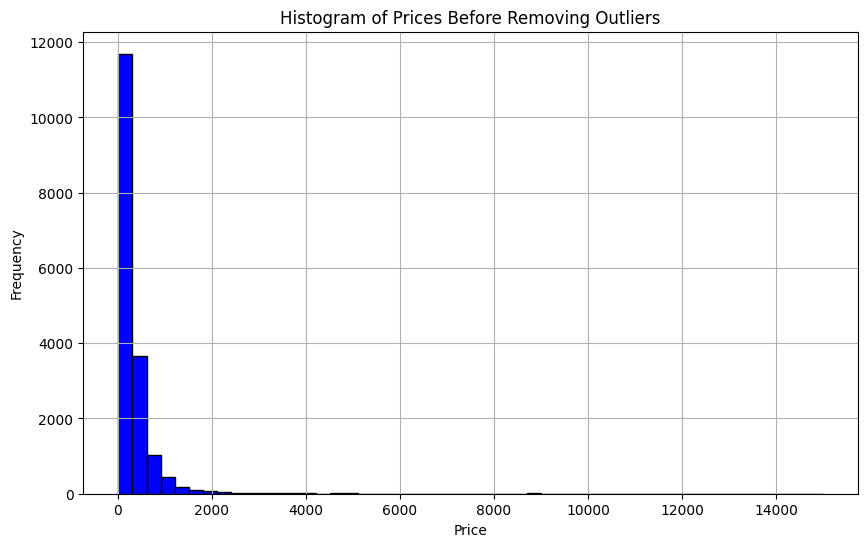

Number of observations removed: 116


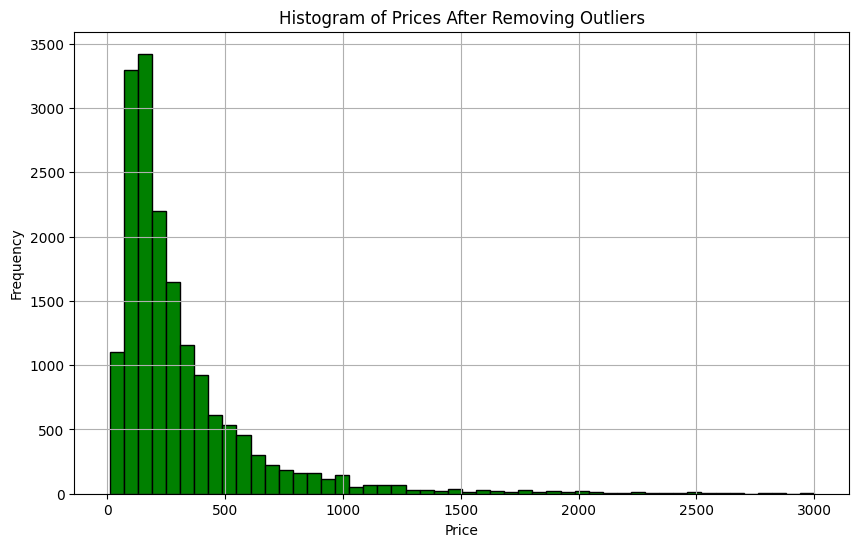

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram of the price column before removing outliers
plt.figure(figsize=(10, 6))
plt.hist(listings_cleaned['price'], bins=50, color='blue', edgecolor='black')
plt.title('Histogram of Prices Before Removing Outliers')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Move observations where price is above 6000
threshold_price = 3000
removed_observations = listings_cleaned[listings_cleaned['price'] > threshold_price]
listings_cleaned = listings_cleaned[listings_cleaned['price'] <= threshold_price]

# Print the number of observations removed
num_removed = removed_observations.shape[0]
print(f"Number of observations removed: {num_removed}")



# Plot histogram of the price column after removing outliers
plt.figure(figsize=(10, 6))
plt.hist(listings_cleaned['price'], bins=50, color='green', edgecolor='black')
plt.title('Histogram of Prices After Removing Outliers')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# Step 5: Adding Sentiment Analysis for Reviews

To gain insights into the overall sentiment of the reviews, we perform sentiment analysis on the comments using TextBlob. We then merge these sentiment scores with the listings data.

In [ ]:
# Install necessary libraries for sentiment analysis
!pip install -q textblob vaderSentiment

from textblob import TextBlob

# Calculate sentiment scores for reviews
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

reviews['sentiment'] = reviews['comments'].apply(lambda x: get_sentiment(str(x)))

# Merge sentiment scores with listings data
sentiment_by_listing = reviews.groupby('listing_id')['sentiment'].mean().reset_index()
listings_cleaned = listings_cleaned.merge(sentiment_by_listing, left_on='id', right_on='listing_id', how='left')

# Display the reviews dataframe with sentiment scores
reviews.head()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.5 MB/s eta 0:00:00


,listing_id,id,date,reviewer_id,reviewer_name,comments,sentiment
0,57818,3247141,2013-01-03,4203034,Gaurav,It was the first trip to Miami for most of us ...,0.332544
1,57818,3402974,2013-01-23,252741,Karen & Adam,Wonderful! Janice was a pleasure to work with...,0.288095
2,57818,3427358,2013-01-28,4539300,Seth,Janice was a wonderful host. Very accommodati...,0.267857
3,57818,3483222,2013-02-05,2171166,Claude,Janice is an fine host. She was very prompt on...,0.381636
4,57818,3514314,2013-02-11,435179,Sean,"Nice place in an excellent, peaceful and famil...",0.494048


In [ ]:
# Install necessary libraries for sentiment analysis
!pip install -q textblob vaderSentiment

from textblob import TextBlob

# Calculate sentiment scores for reviews
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

reviews['sentiment'] = reviews['comments'].apply(lambda x: get_sentiment(str(x)))

# Merge sentiment scores with listings data
sentiment_by_listing = reviews.groupby('listing_id')['sentiment'].mean().reset_index()
listings_cleaned = listings_cleaned.merge(sentiment_by_listing, left_on='id', right_on='listing_id', how='left')

# Display the reviews dataframe with sentiment scores
reviews.head()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.6 MB/s eta 0:00:00


,listing_id,id,date,reviewer_id,reviewer_name,comments,sentiment
0,57818,3247141,2013-01-03,4203034,Gaurav,It was the first trip to Miami for most of us ...,0.332544
1,57818,3402974,2013-01-23,252741,Karen & Adam,Wonderful! Janice was a pleasure to work with...,0.288095
2,57818,3427358,2013-01-28,4539300,Seth,Janice was a wonderful host. Very accommodati...,0.267857
3,57818,3483222,2013-02-05,2171166,Claude,Janice is an fine host. She was very prompt on...,0.381636
4,57818,3514314,2013-02-11,435179,Sean,"Nice place in an excellent, peaceful and famil...",0.494048


In [ ]:
# Save the cleaned dataframe to a CSV file
# listings_cleaned.to_csv('/content/drive/MyDrive/airbnd/airbnb-price-analysis/data/listings_cleaned_updated_bedrooms.csv', index=False)
# listings_cleaned.to_csv('/content/drive/MyDrive/airbnd/airbnb-price-analysis/data/listings_cleaned_updated_bedrooms_FJ.csv', index=False)

In [54]:
# listings_cleaned = pd.read_csv('/content/drive/MyDrive/airbnd/airbnb-price-analysis/data/listings_cleaned_updated_bedrooms.csv')

listings_cleaned = pd.read_csv('/content/drive/MyDrive/airbnd/airbnb-price-analysis/data/listings_cleaned_updated_bedrooms_FJ.csv')
listings_cleaned.head()

,id,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,...,review_scores_location,review_scores_value,reviews_per_month,bathrooms,vacancy_rate_30,vacancy_rate_60,vacancy_rate_90,vacancy_rate_365,listing_id,sentiment
0,57818,275948,Von Inc,2010-11-01,within an hour,100.0,96.0,t,3.0,3.0,...,4.88,4.71,0.43,1.0,0.066667,0.033333,0.111111,0.586301,57818.0,0.374216
1,69824,351303,Tracy,2011-01-17,within an hour,100.0,50.0,f,3.0,5.0,...,5.00,4.50,0.12,2.0,0.633333,0.316667,0.211111,0.769863,69824.0,0.190601
2,83449,454736,"Jon, Mary Pop Apartments",2011-03-21,within an hour,100.0,97.0,f,17.0,20.0,...,4.81,4.87,0.21,1.0,0.000000,0.016667,0.011111,0.002740,83449.0,0.392146
3,105411,532930,Sonia,2011-04-25,within an hour,80.0,57.0,f,3.0,3.0,...,4.25,5.00,0.03,2.0,0.800000,0.900000,0.933333,0.983562,105411.0,0.184327
4,129099,637272,Bianca,2011-05-28,a few days or more,36.0,18.0,f,9.0,19.0,...,4.54,4.08,0.18,1.5,0.200000,0.300000,0.322222,0.832877,129099.0,0.374725


## Step 7: Isolating Important Features

In this step, we focus on cleaning and preparing our dataset to isolate the most important features for predicting the listing price. The process involves several key steps:

1. **Initial Data Cleaning**: We begin by examining the initial state of the dataframe and printing its shape and a sample of rows to understand its structure.

2. **Calculating Average Sub-Review Scores**: We calculate the average of several review scores to create a new feature called `sub_review_average`. This step helps to reduce the dimensionality of the dataset while retaining critical information about the reviews.

3. **Calculating Long-Term Vacancy Rate**: We calculate the long-term vacancy rate by averaging several vacancy rate columns. This new feature provides insight into the occupancy of the listing over different time periods.

4. **Removing Unnecessary Columns**: We remove additional columns that are either redundant or not useful for our analysis. This step helps simplify the dataset and focus on the most relevant features.

5. **Encoding Categorical Variables**: We use Target Encoding to convert categorical variables into numerical values. This step is crucial for machine learning models to process categorical data effectively.

6. **Feature Selection Based on Correlation**: We calculate the correlation matrix to identify which features are most strongly correlated with the target variable, price. Features with a low correlation are removed from the dataset.

7. **Visualizing Correlation with Price**: We visualize the correlation of each feature with the price before and after feature selection. This helps us understand the importance of each feature in predicting the price.

By following these steps, we ensure that our dataset is clean, relevant, and ready for building predictive models. The focus is on retaining only those features that have a significant impact on the listing price, thus improving the model's accuracy and interpretability.


Initial dataframe shape: (17266, 43)
       id  host_id                  host_name  host_since  host_response_time  \
0   57818   275948                    Von Inc  2010-11-01      within an hour   
1   69824   351303                      Tracy  2011-01-17      within an hour   
2   83449   454736  Jon,  Mary Pop Apartments  2011-03-21      within an hour   
3  105411   532930                      Sonia  2011-04-25      within an hour   
4  129099   637272                     Bianca  2011-05-28  a few days or more   

   host_response_rate  host_acceptance_rate host_is_superhost  \
0               100.0                  96.0                 t   
1               100.0                  50.0                 f   
2               100.0                  97.0                 f   
3                80.0                  57.0                 f   
4                36.0                  18.0                 f   

   host_listings_count  host_total_listings_count  ... review_scores_value  \
0      

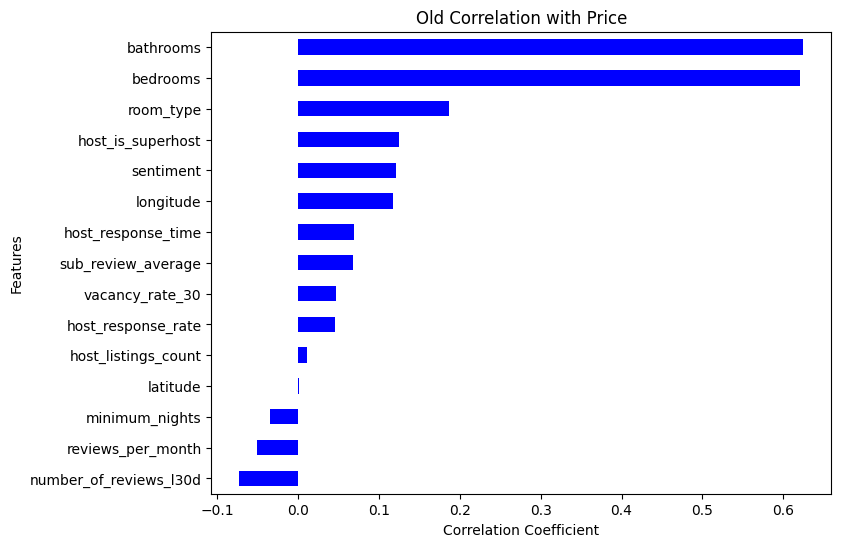

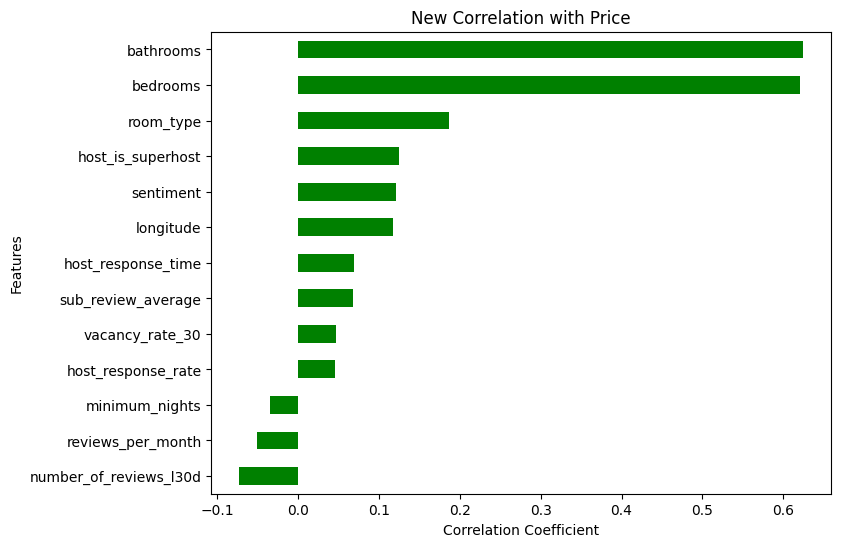

Final dataframe shape: (17266, 14)
   host_response_time  host_response_rate  host_is_superhost  longitude  \
0          325.651430               100.0         366.280422  -80.12430   
1          325.651430               100.0         282.499769  -80.12052   
2          325.651430               100.0         282.499769  -80.14201   
3          325.651430                80.0         282.499769  -80.36668   
4          241.911523                36.0         282.499769  -80.11814   

    room_type  bedrooms  price  minimum_nights  number_of_reviews_l30d  \
0  339.278836       2.0  190.0              32                       0   
1  339.278836       2.0  140.0              30                       0   
2  339.278836       2.0  127.0               7                       1   
3  339.278836       3.0  235.0               4                       0   
4  339.278836       1.0  324.0              20                       0   

   reviews_per_month  bathrooms  vacancy_rate_30  sentiment  \
0     

In [57]:
## FINAL with FJ

 # !pip install q category_encoders
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import category_encoders as ce

# Sample of the provided data preparation steps
listings_cleaned_reduced = listings_cleaned

# Debug print initial state of the dataframe
print("Initial dataframe shape:", listings_cleaned_reduced.shape)
print(listings_cleaned_reduced.head())

# Calculate the average sub-review score
sub_review_columns = [
    'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
    'review_scores_communication', 'review_scores_location', 'review_scores_value', 'review_scores_rating'
]

listings_cleaned_reduced['sub_review_average'] = listings_cleaned_reduced[sub_review_columns].mean(axis=1)

# Drop the individual sub-review score columns
listings_cleaned_reduced = listings_cleaned_reduced.drop(columns=sub_review_columns)

# Calculate the long-term vacancy rate
vacancy_rate_columns = [
    'vacancy_rate_365', 'vacancy_rate_60', 'vacancy_rate_90'
]
listings_cleaned_reduced['longterm_vacancy_rate'] = listings_cleaned_reduced[vacancy_rate_columns].mean(axis=1)

# Drop the individual vacancy rate columns
listings_cleaned_reduced = listings_cleaned_reduced.drop(columns=vacancy_rate_columns)

# Define additional columns to remove
additional_columns_to_remove = [
    "id", "listing_id", "host_total_listings_count", "availability_60",
    "availability_30", "availability_90", "availability_365", "number_of_reviews_ltm", "host_id",
    "host_acceptance_rate", "maximum_nights", "longterm_vacancy_rate", "number_of_reviews"
]

# Only drop columns that exist in the DataFrame
existing_columns_to_remove = [col for col in additional_columns_to_remove if col in listings_cleaned_reduced.columns]

# Drop the existing columns
listings_cleaned_reduced = listings_cleaned_reduced.drop(columns=existing_columns_to_remove)

# Debug print after dropping columns
print("Dataframe shape after dropping columns:", listings_cleaned_reduced.shape)
print(listings_cleaned_reduced.head())

# Encode categorical variables using Target Encoding
categorical_cols = ['host_response_time', 'host_is_superhost', 'room_type']  # Add more categorical columns as needed
target_col = 'price'

# Initialize the target encoder
encoder = ce.TargetEncoder(cols=categorical_cols)

# Fit the encoder and transform the data
listings_cleaned_reduced[categorical_cols] = encoder.fit_transform(listings_cleaned_reduced[categorical_cols], listings_cleaned_reduced[target_col])

# Display the first 5 rows of the modified dataframe
print("First 5 rows of the modified dataframe:")
print(listings_cleaned_reduced.head())

# Calculate the old correlation matrix for only numeric columns
old_correlation_matrix = listings_cleaned_reduced.select_dtypes(include='number').corr()

# Set a threshold for correlation coefficient
correlation_threshold = 0.03

# Select features with absolute correlation above the threshold
important_features = old_correlation_matrix['price'].abs().loc[old_correlation_matrix['price'].abs() > correlation_threshold].index

# Identify and print the features that were removed
removed_features = [feature for feature in listings_cleaned_reduced.columns if feature not in important_features]
print("Features removed due to low correlation with price:")
print(removed_features)

# Reduce the dataframe to these important features
listings_cleaned_reduced = listings_cleaned_reduced[important_features]

# Display the remaining features
print("Remaining features after correlation-based feature selection:")
print(listings_cleaned_reduced.columns)

# Calculate the new correlation matrix for only numeric columns
new_correlation_matrix = listings_cleaned_reduced.select_dtypes(include='number').corr()

# Print the old and new correlation matrices
print("\nOld Correlation Matrix:")
print(old_correlation_matrix)

print("\nNew Correlation Matrix:")
print(new_correlation_matrix)

# Display the correlation matrix for price with other numerical columns as a bar plot
plt.figure(figsize=(8, 6))
old_correlation_matrix['price'].drop('price').sort_values().plot(kind='barh', color='blue')
plt.title('Old Correlation with Price')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

plt.figure(figsize=(8, 6))
new_correlation_matrix['price'].drop('price').sort_values().plot(kind='barh', color='green')
plt.title('New Correlation with Price')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

# Debug print after correlation-based feature selection
print("Final dataframe shape:", listings_cleaned_reduced.shape)
print(listings_cleaned_reduced.head())


## Step 8: Data Splitting for Model Training

In this step, we prepare the dataset for training machine learning models by performing the following tasks:

1. **Ensure Compatibility between TensorFlow and Keras**: We ensure that the TensorFlow and Keras versions are compatible for smooth model training and evaluation.

2. **Define Features and Target Variable**: We separate the features and the target variable (price) from the cleaned dataset.

3. **Handle Missing Values**: We drop any rows with NaN values in the target variable to ensure a complete dataset for training.

4. **Identify Numeric and Categorical Columns**: We identify which columns are numeric and which are categorical to apply appropriate preprocessing steps.

5. **Non-Negative Feature Transformation**: For features that should not have negative values, such as `bathrooms`, `bedrooms`, and `vacancy_rate_30`, we use MinMaxScaler to scale them between 0 and 1 after imputing any missing values with the mean.

6. **Standard Numeric Feature Transformation**: For other numeric features, we use StandardScaler to standardize them after imputing any missing values with the mean.

7. **Categorical Feature Transformation**: For categorical features, we use OneHotEncoder to convert them into a format suitable for machine learning models after imputing any missing values with the most frequent value. If there are no categorical features, we drop this step.

8. **Combine Preprocessing Steps**: We combine all preprocessing steps using ColumnTransformer to ensure that all features are transformed appropriately.

9. **Split Data into Training and Testing Sets**: We split the data into training and testing sets to evaluate the performance of our models. We use an 80-20 split for training and testing, respectively.

10. **Apply Preprocessing**: We apply the preprocessing steps to both the training and testing sets.

11. **Extract Feature Names**: We extract feature names after preprocessing for better readability and debugging.

12. **Convert Features to DataFrames**: We convert the preprocessed training and testing features back to DataFrames to facilitate further analysis and model training.

By following these steps, we ensure that the dataset is well-prepared for building robust and accurate machine learning models.


In [ ]:
## FINAL WITH FJ

# Ensure compatibility between TensorFlow and Keras
!pip uninstall -y keras
!pip install -q keras==2.15.0 tensorflow==2.15.0

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import category_encoders as ce

# Assuming listings_cleaned_reduced is already prepared

# Define the features and target variable
features = listings_cleaned_reduced.drop(columns=['price'])
target = listings_cleaned_reduced['price']

# Debug print the initial shape of features and target
print("Initial features shape:", features.shape)
print("Initial target shape:", target.shape)

# Drop rows with NaN values in the target variable
features = features[target.notna()]
target = target.dropna()

# Debug print the shape of features and target after dropping NaNs
print("Features shape after dropping NaNs:", features.shape)
print("Target shape after dropping NaNs:", target.shape)

# Identify numeric and categorical columns
numeric_features = features.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = features.select_dtypes(include=[object, 'category']).columns.tolist()

# Identify specific features that should not have negative values
non_negative_features = ['bathrooms', 'bedrooms', 'vacancy_rate_30']

# Create a transformer for non-negative features using MinMaxScaler
non_negative_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

# Create a transformer for other numeric features using StandardScaler
standard_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Create a transformer for categorical features
if not categorical_features:
    categorical_transformer = 'drop'
else:
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('non_neg', non_negative_transformer, non_negative_features),
        ('num', standard_transformer, [col for col in numeric_features if col not in non_negative_features]),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Debug print shapes of train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Extract feature names from the preprocessor
if categorical_features:
    onehot_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
else:
    onehot_feature_names = []

all_feature_names = non_negative_features + [col for col in numeric_features if col not in non_negative_features] + list(onehot_feature_names)

# Convert the training and testing features to DataFrames for better readability
X_train_df = pd.DataFrame(X_train, columns=all_feature_names)
X_test_df = pd.DataFrame(X_test, columns=all_feature_names)

# Debug print after preprocessing
print("X_train_df shape after preprocessing:", X_train_df.shape)
print("X_test_df shape after preprocessing:", X_test_df.shape)

# Check the target variable y_test
print("y_test sample after splitting:")
print(y_test.head())


Found existing installation: keras 2.15.0
Uninstalling keras-2.15.0:
  Successfully uninstalled keras-2.15.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.9 MB/s eta 0:00:00
Initial features shape: (17266, 13)
Initial target shape: (17266,)
Features shape after dropping NaNs: (17266, 13)
Target shape after dropping NaNs: (17266,)
X_train shape: (13812, 13)
X_test shape: (3454, 13)
y_train shape: (13812,)
y_test shape: (3454,)
X_train_df shape after preprocessing: (13812, 13)
X_test_df shape after preprocessing: (3454, 13)
y_test sample after splitting:
9009     488.0
12614    171.0
4049     164.0
12456    110.0
456      125.0
Name: price, dtype: float64


## Step 9: Training Non-Hyperparameter Tuned Random Forest

In this step, we train a Random Forest model without any hyperparameter tuning. The Random Forest algorithm is a powerful and versatile ensemble learning method that builds multiple decision trees and merges them together to get a more accurate and stable prediction.

### Steps Involved:

1. **Define mean_absolute_percentage_error Function**: We define a custom function to calculate the Mean Absolute Percentage Error (MAPE), which is a measure of prediction accuracy in a regression model.

2. **Train the Random Forest Model**: We initialize a Random Forest Regressor with 100 estimators and train it on the training data.

3. **Make Predictions**: We use the trained Random Forest model to make predictions on the test data.

4. **Evaluate the Model**: We evaluate the performance of the model using several metrics:
   - Mean Squared Error (MSE)
   - Root Mean Squared Error (RMSE)
   - Mean Absolute Error (MAE)
   - Mean Absolute Percentage Error (MAPE)
   - R-squared (R²) score

5. **Compute Feature Importance**: We compute the permutation feature importance to understand the importance of each feature in predicting the target variable. This is done by permuting each feature and measuring the impact on the model’s performance.

6. **Plot Feature Importance**: We visualize the feature importance to see which features are most important for predicting the price.

By following these steps, we gain insights into the model's performance and the significance of different features in making predictions.


Random Forest MSE: 38429.70235992446
Random Forest RMSE: 196.03495188339363
Random Forest MAE: 107.02892180310522
Random Forest MAPE: 42.2263450368768
Random Forest R^2: 0.5968851222320379


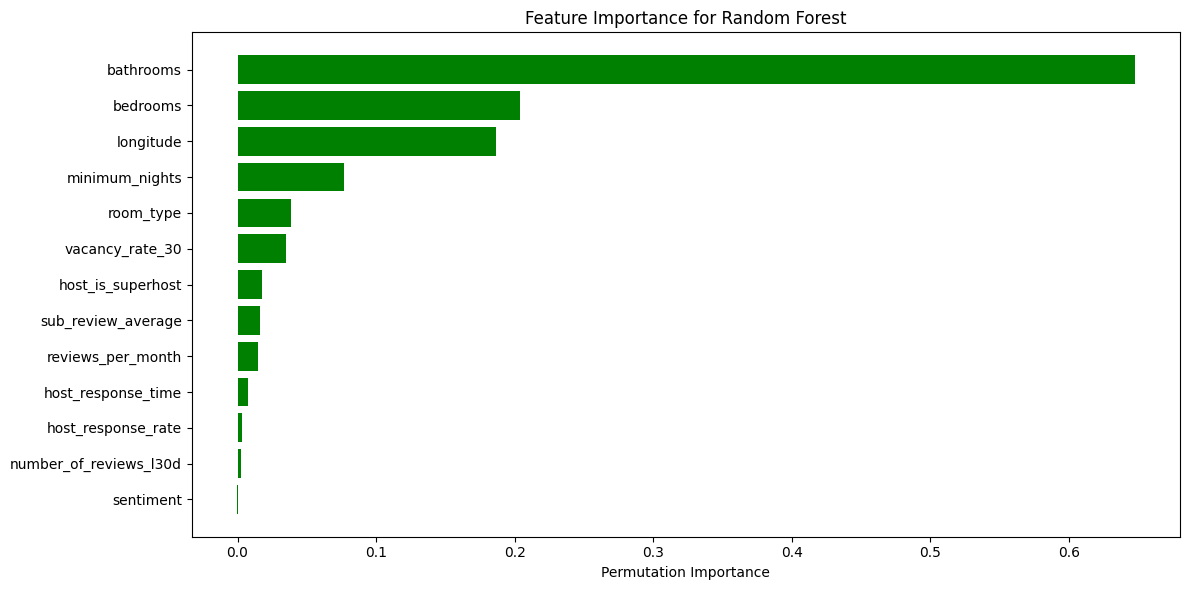

In [ ]:
## FINAL WITH FJ

# Define mean_absolute_percentage_error function
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions using the Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest MSE: {mse_rf}')
print(f'Random Forest RMSE: {rmse_rf}')
print(f'Random Forest MAE: {mae_rf}')
print(f'Random Forest MAPE: {mape_rf}')
print(f'Random Forest R^2: {r2_rf}')

# Compute permutation feature importance for Random Forest model
rf_importance = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42)

# Sort feature importances for better visualization
sorted_idx_rf = rf_importance.importances_mean.argsort()

# Plot Random Forest feature importance
plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx_rf)), rf_importance.importances_mean[sorted_idx_rf], align="center", color='green')
plt.yticks(range(len(sorted_idx_rf)), [all_feature_names[i] for i in sorted_idx_rf])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance for Random Forest")
plt.tight_layout()
plt.show()


## Step 10: Training Hyperparameter Tuned Random Forest

In this step, we utilize Optuna, a hyperparameter optimization framework, to find the best hyperparameters for our Random Forest model. Hyperparameter tuning is crucial to improve the performance of machine learning models by selecting the optimal set of hyperparameters.

### Steps Involved:

1. **Import Optuna and Other Necessary Libraries**: We import Optuna along with the required libraries for model evaluation and hyperparameter tuning.

2. **Split Data for Training and Validation**: We further split our training data into training and validation sets to ensure that the model is not overfitting and can generalize well to unseen data.

3. **Define the Objective Function for Optuna**: The objective function defines the search space for hyperparameters and evaluates the model using cross-validation. The hyperparameters being optimized include:
   - `n_estimators`: Number of trees in the forest.
   - `max_depth`: Maximum depth of the trees.
   - `min_samples_split`: Minimum number of samples required to split an internal node.
   - `min_samples_leaf`: Minimum number of samples required to be at a leaf node.
   - `max_features`: Number of features to consider when looking for the best split.
   - `bootstrap`: Whether bootstrap samples are used when building trees.

4. **Run the Optuna Study**: We create and run the Optuna study, which performs hyperparameter optimization over multiple trials to minimize the mean squared error.

5. **Train the Random Forest Model with Tuned Hyperparameters**: Using the best hyperparameters identified by Optuna, we train the final Random Forest model on the entire training data.

6. **Make Predictions and Evaluate the Model**: We make predictions on the test data and evaluate the model's performance using various metrics:
   - Mean Squared Error (MSE)
   - Root Mean Squared Error (RMSE)
   - Mean Absolute Error (MAE)
   - Mean Absolute Percentage Error (MAPE)
   - R-squared (R²) score

7. **Compute and Plot Feature Importance**: We compute the permutation feature importance for the tuned Random Forest model to understand the significance of each feature in making predictions.

8. **Compare Original and Tuned Random Forest Models**: We visually compare the performance of the original and tuned Random Forest models by plotting actual vs. predicted listing prices.

By fine-tuning the hyperparameters, we aim to enhance the accuracy and reliability of our Random Forest model in predicting listing prices.


[I 2024-07-23 15:43:55,813] A new study created in memory with name: no-name-e7944c0b-b990-44b6-bd29-2aa9faa425f3
[I 2024-07-23 15:44:19,268] Trial 0 finished with value: 49444.31349989915 and parameters: {'n_estimators': 394, 'max_depth': 10, 'min_samples_split': 11, 'min_samples_leaf': 18, 'max_features': 'log2', 'bootstrap': True}. Best is trial 0 with value: 49444.31349989915.
[I 2024-07-23 15:44:51,229] Trial 1 finished with value: 60362.64311452083 and parameters: {'n_estimators': 139, 'max_depth': 11, 'min_samples_split': 13, 'min_samples_leaf': 4, 'max_features': 1.0, 'bootstrap': False}. Best is trial 0 with value: 49444.31349989915.
[I 2024-07-23 15:45:08,636] Trial 2 finished with value: 47751.93548188181 and parameters: {'n_estimators': 496, 'max_depth': 12, 'min_samples_split': 7, 'min_samples_leaf': 12, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 2 with value: 47751.93548188181.
[I 2024-07-23 15:45:15,489] Trial 3 finished with value: 51809.402259432085 and 

Best hyperparameters for Random Forest: {'n_estimators': 289, 'max_depth': 16, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'bootstrap': False}
Tuned Random Forest MSE: 34658.70224052457
Tuned Random Forest RMSE: 186.16847810659186
Tuned Random Forest MAE: 105.40983045484931
Tuned Random Forest MAPE: 0.4146029478295472
Tuned Random Forest R^2: 0.6364416672699746


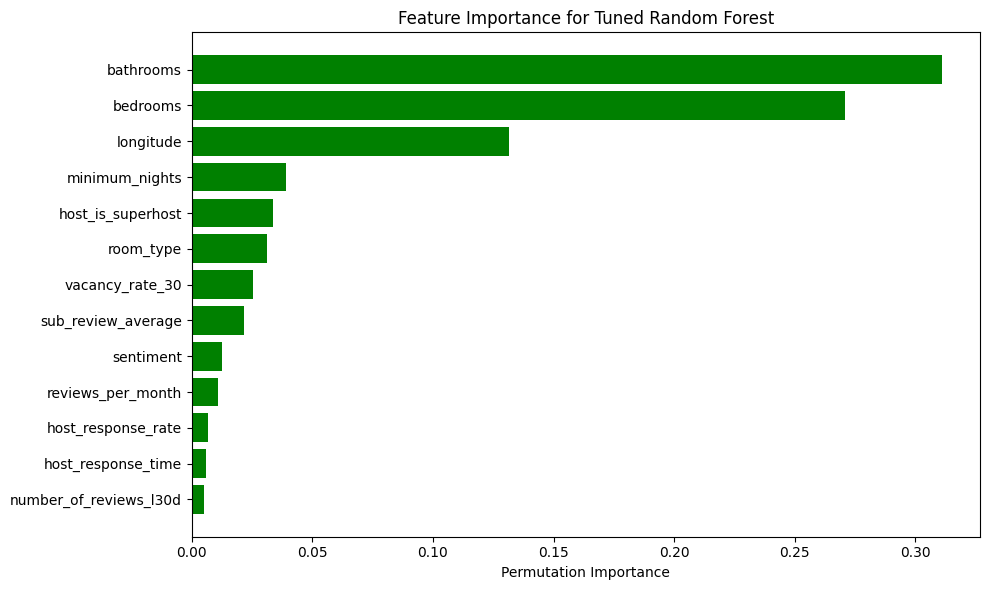

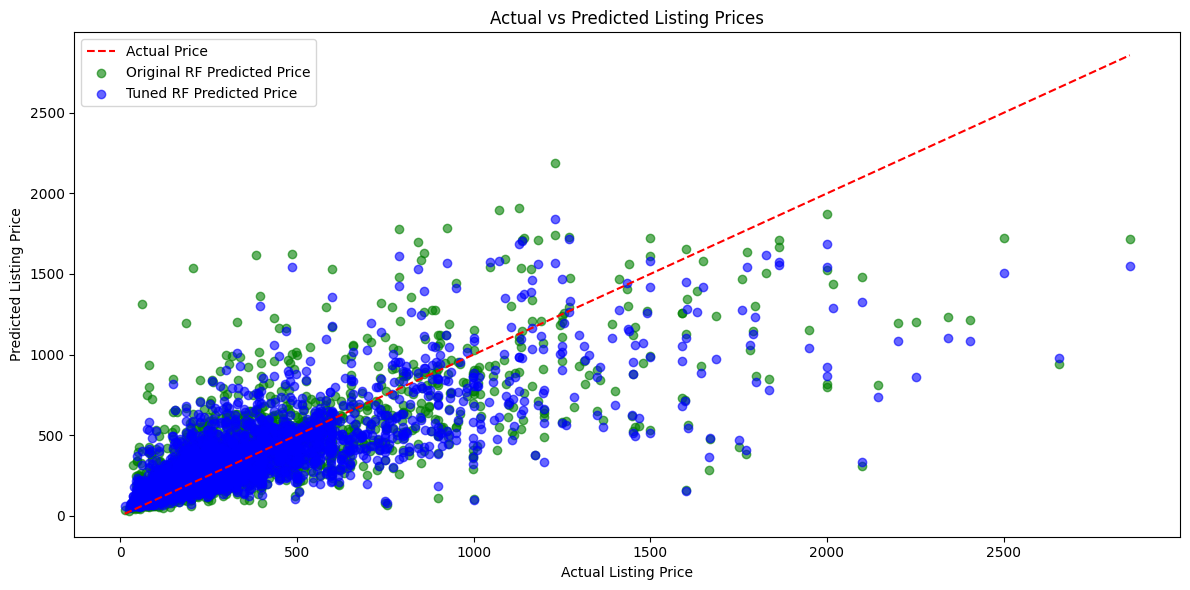

In [ ]:
## FINAL WITH FJ

# !pip install -q optuna
import optuna
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# Split the training data further into training and validation sets
X_train_main, X_valid, y_train_main, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

def objective_rf(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    max_depth = trial.suggest_int('max_depth', 3, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', 1.0])
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])

    rf_model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        random_state=42,
        n_jobs=-1
    )

    # Perform 5-fold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(rf_model, X_train_main, y_train_main, cv=kf, scoring='neg_mean_squared_error')
    mean_cv_score = -cv_scores.mean()

    return mean_cv_score

study_rf = optuna.create_study(direction='minimize')
study_rf.optimize(objective_rf, n_trials=50)

print('Best hyperparameters for Random Forest:', study_rf.best_params)

# Train the Random Forest model with tuned hyperparameters on the full training data
best_rf_model = RandomForestRegressor(
    **study_rf.best_params,
    random_state=42,
    n_jobs=-1
)
best_rf_model.fit(X_train, y_train)

# Make predictions
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the model
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
rmse_best_rf = np.sqrt(mse_best_rf)
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
mape_best_rf = mean_absolute_percentage_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f'Tuned Random Forest MSE: {mse_best_rf}')
print(f'Tuned Random Forest RMSE: {rmse_best_rf}')
print(f'Tuned Random Forest MAE: {mae_best_rf}')
print(f'Tuned Random Forest MAPE: {mape_best_rf}')
print(f'Tuned Random Forest R^2: {r2_best_rf}')

# Plot feature importance for the tuned Random Forest model
tuned_rf_importance = permutation_importance(best_rf_model, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx_tuned_rf = tuned_rf_importance.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx_tuned_rf)), tuned_rf_importance.importances_mean[sorted_idx_tuned_rf], align="center", color='green')
plt.yticks(range(len(sorted_idx_tuned_rf)), [all_feature_names[i] for i in sorted_idx_tuned_rf])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance for Tuned Random Forest")
plt.tight_layout()
plt.show()

# Compare original RF and tuned RF models
plt.figure(figsize=(12, 6))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual Price')
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='green', label='Original RF Predicted Price')
plt.scatter(y_test, y_pred_best_rf, alpha=0.6, color='blue', label='Tuned RF Predicted Price')
plt.xlabel('Actual Listing Price')
plt.ylabel('Predicted Listing Price')
plt.title('Actual vs Predicted Listing Prices')
plt.legend()
plt.tight_layout()
plt.show()



## Step 11: Training and Evaluating the Neural Network Model

In this step, we train and evaluate a Neural Network (NN) model to predict listing prices. Neural Networks are powerful machine learning models that can capture complex relationships within data. We will compare the performance of this model with the previously trained Random Forest models to determine which features are most important for predicting price.

### Steps Involved:

1. **Define the Neural Network Model**: We define a Sequential model with three layers:
   - An input layer with 64 neurons and ReLU activation.
   - A hidden layer with 32 neurons and ReLU activation.
   - An output layer with 1 neuron and linear activation.

2. **Compile the Model**: The model is compiled using the Adam optimizer and Mean Squared Error (MSE) as the loss function. Mean Absolute Error (MAE) is used as an additional evaluation metric.

3. **Train the Model**: We train the model on the training data for 150 epochs with a batch size of 32. We also use 20% of the training data as a validation set to monitor the model's performance during training.

4. **Make Predictions and Evaluate the Model**: After training, we make predictions on the test data and evaluate the model using various metrics:
   - Mean Squared Error (MSE)
   - Root Mean Squared Error (RMSE)
   - Mean Absolute Error (MAE)
   - Mean Absolute Percentage Error (MAPE)
   - R-squared (R²) score

5. **Compute Permutation Feature Importance**: We compute permutation feature importance for the Neural Network model to understand the significance of each feature in making predictions.

6. **Compare Feature Importances**: We compare the feature importances of the Neural Network model with the tuned Random Forest model by normalizing the importances and plotting them side by side.

7. **Visualize Actual vs Predicted Prices**: We plot the actual vs predicted prices for the original Random Forest, tuned Random Forest, and Neural Network models to visually compare their performances. We also log-transform the actual and predicted values and plot them for better visualization.

By training and evaluating the Neural Network model, we aim to identify the most important features for predicting listing prices and compare the performance of different machine learning models.


Epoch 1/150
346/346 [==============================] - 6s 6ms/step - loss: 143999.0000 - mae: 234.1002 - val_loss: 103133.2891 - val_mae: 191.2342
Epoch 2/150
346/346 [==============================] - 2s 5ms/step - loss: 85314.0547 - mae: 181.8748 - val_loss: 96295.3516 - val_mae: 183.6779
Epoch 3/150
346/346 [==============================] - 2s 5ms/step - loss: 79479.8359 - mae: 175.5648 - val_loss: 89158.7188 - val_mae: 181.4595
Epoch 4/150
346/346 [==============================] - 2s 5ms/step - loss: 73615.8906 - mae: 168.9561 - val_loss: 82322.2188 - val_mae: 171.7571
Epoch 5/150
346/346 [==============================] - 1s 4ms/step - loss: 67577.4375 - mae: 160.1008 - val_loss: 75366.6875 - val_mae: 159.5626
Epoch 6/150
346/346 [==============================] - 1s 3ms/step - loss: 62134.1523 - mae: 150.1829 - val_loss: 69390.6875 - val_mae: 152.3974
Epoch 7/150
346/346 [==============================] - 1s 3ms/step - loss: 58593.2148 - mae: 142.1054 - val_loss: 66175.2266 - v

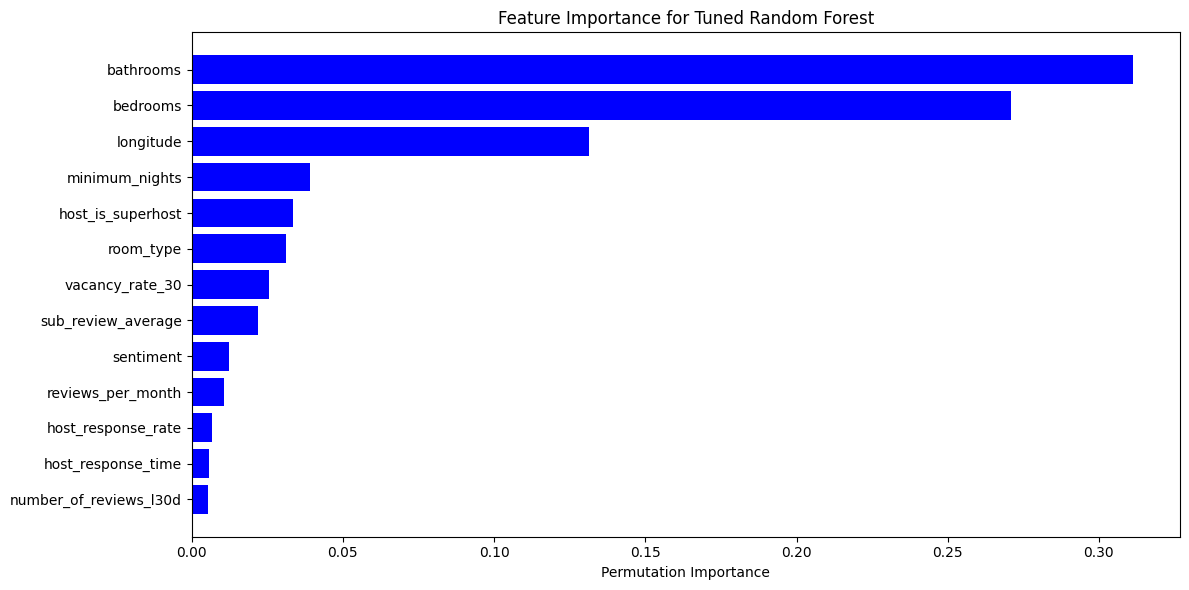

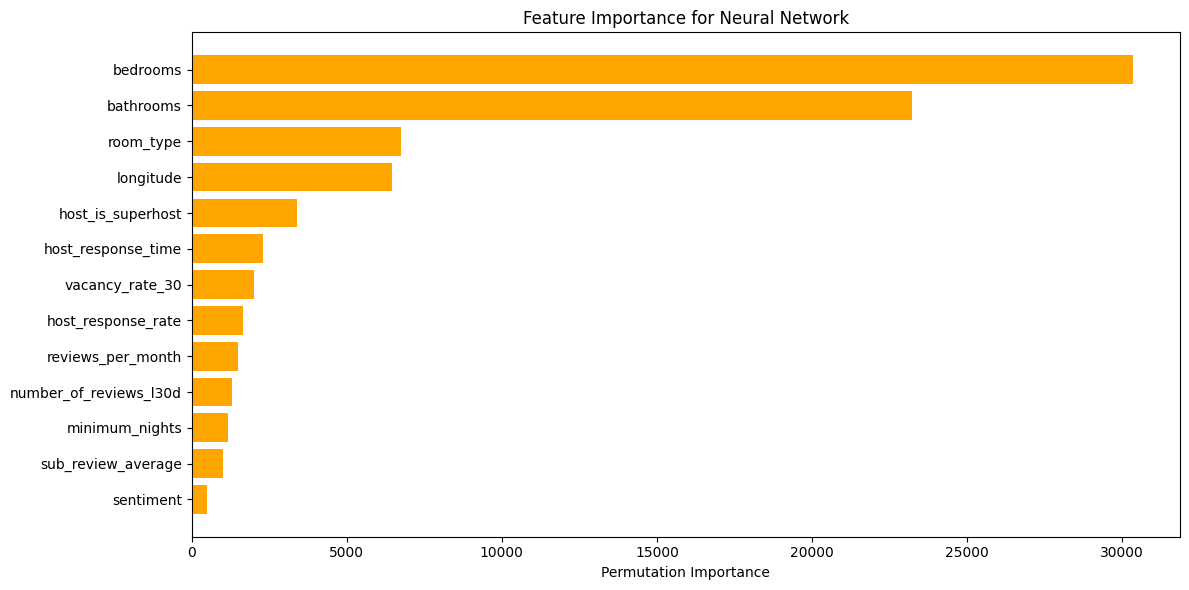

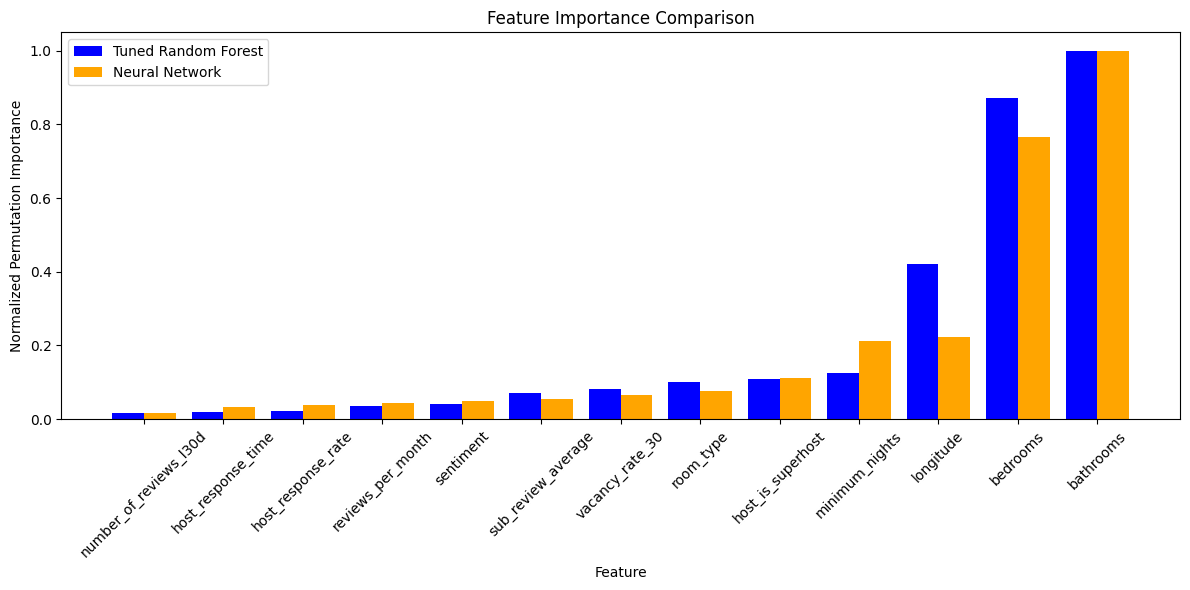

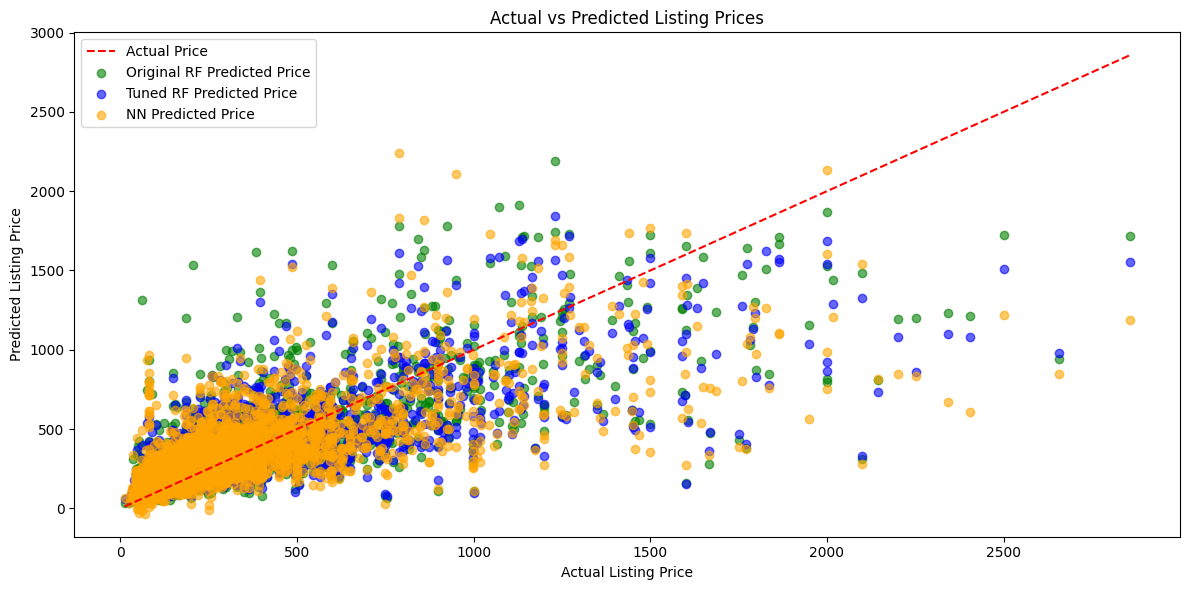

<ipython-input-31-a2450c023f6a>:128: RuntimeWarning: invalid value encountered in log1p
  log_y_pred_nn = np.log1p(y_pred_nn)


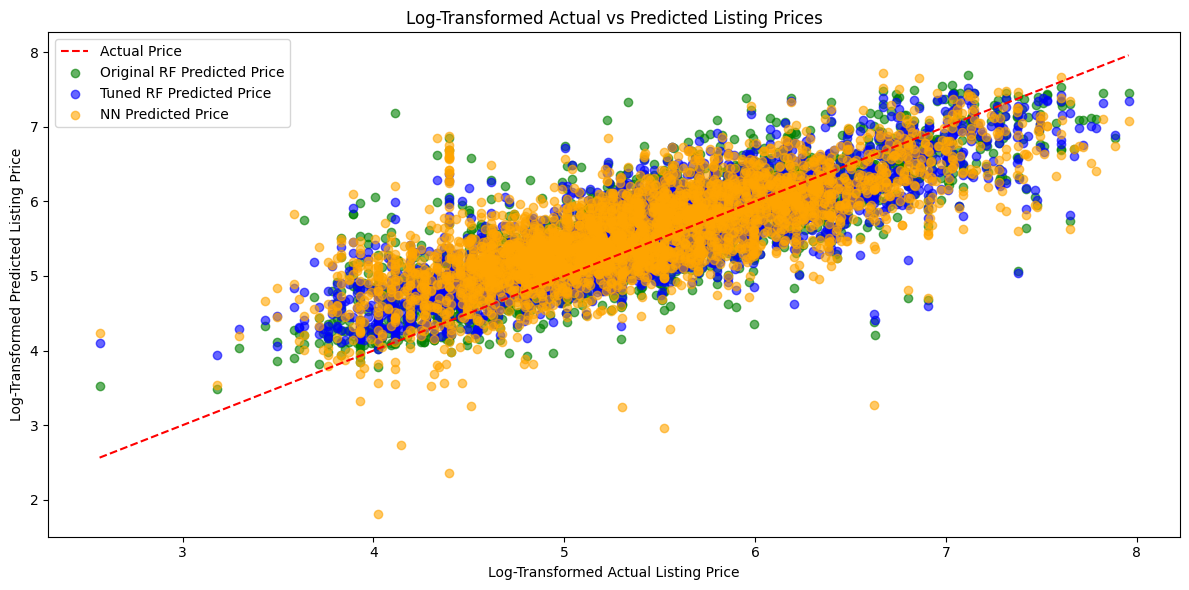

In [ ]:
## FINAL WITH FJ

# Define the Neural Network model
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Create the model
nn_model = create_model()

# Train the model
nn_model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions
y_pred_nn = nn_model.predict(X_test).flatten()

# Evaluate the model
mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
mape_nn = mean_absolute_percentage_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f'Neural Network MSE: {mse_nn}')
print(f'Neural Network RMSE: {rmse_nn}')
print(f'Neural Network MAE: {mae_nn}')
print(f'Neural Network MAPE: {mape_nn}')
print(f'Neural Network R^2: {r2_nn}')

# Use the best hyperparameters to train a new Random Forest model
best_rf_model = RandomForestRegressor(
    **study_rf.best_params,
    random_state=42,
    n_jobs=-1
)
best_rf_model.fit(X_train, y_train)

# Make predictions using the tuned Random Forest model
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the tuned Random Forest model
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
rmse_best_rf = np.sqrt(mse_best_rf)
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
mape_best_rf = mean_absolute_percentage_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f'Tuned Random Forest MSE: {mse_best_rf}')
print(f'Tuned Random Forest RMSE: {rmse_best_rf}')
print(f'Tuned Random Forest MAE: {mae_best_rf}')
print(f'Tuned Random Forest MAPE: {mape_best_rf}')
print(f'Tuned Random Forest R^2: {r2_best_rf}')

# Compute permutation feature importance for tuned Random Forest model
tuned_rf_importance = permutation_importance(best_rf_model, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx_tuned_rf = tuned_rf_importance.importances_mean.argsort()

# Compute permutation feature importance for Neural Network model
nn_importance = permutation_importance(nn_model, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_squared_error')
sorted_idx_nn = nn_importance.importances_mean.argsort()

# Plot tuned Random Forest feature importance
plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx_tuned_rf)), tuned_rf_importance.importances_mean[sorted_idx_tuned_rf], align="center", color='blue')
plt.yticks(range(len(sorted_idx_tuned_rf)), [all_feature_names[i] for i in sorted_idx_tuned_rf])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance for Tuned Random Forest")
plt.tight_layout()
plt.show()

# Plot Neural Network feature importance
plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx_nn)), nn_importance.importances_mean[sorted_idx_nn], align="center", color='orange')
plt.yticks(range(len(sorted_idx_nn)), [all_feature_names[i] for i in sorted_idx_nn])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance for Neural Network")
plt.tight_layout()
plt.show()

# Combine feature importances for comparison
importance_df = pd.DataFrame({
    'Feature': [all_feature_names[i] for i in sorted_idx_tuned_rf],
    'Tuned Random Forest': tuned_rf_importance.importances_mean[sorted_idx_tuned_rf],
    'Neural Network': nn_importance.importances_mean[sorted_idx_nn]
})

# Normalize the importances to the same scale (0 to 1)
importance_df['Tuned Random Forest'] /= importance_df['Tuned Random Forest'].max()
importance_df['Neural Network'] /= importance_df['Neural Network'].max()

# Plot combined feature importances for comparison
plt.figure(figsize=(12, 6))
bar_width = 0.4
index = np.arange(len(importance_df))

plt.bar(index, importance_df['Tuned Random Forest'], bar_width, label='Tuned Random Forest', color='blue')
plt.bar(index + bar_width, importance_df['Neural Network'], bar_width, label='Neural Network', color='orange')

plt.xlabel('Feature')
plt.ylabel('Normalized Permutation Importance')
plt.title('Feature Importance Comparison')
plt.xticks(index + bar_width / 2, importance_df['Feature'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plot actual vs predicted prices for the original RF, tuned RF, and NN models
plt.figure(figsize=(12, 6))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual Price')
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='green', label='Original RF Predicted Price')
plt.scatter(y_test, y_pred_best_rf, alpha=0.6, color='blue', label='Tuned RF Predicted Price')
plt.scatter(y_test, y_pred_nn, alpha=0.6, color='orange', label='NN Predicted Price')
plt.xlabel('Actual Listing Price')
plt.ylabel('Predicted Listing Price')
plt.title('Actual vs Predicted Listing Prices')
plt.legend()
plt.tight_layout()
plt.show()

# Log-transform the actual and predicted values
log_y_test = np.log1p(y_test)
log_y_pred_rf = np.log1p(y_pred_rf)
log_y_pred_best_rf = np.log1p(y_pred_best_rf)
log_y_pred_nn = np.log1p(y_pred_nn)

# Plot log-transformed actual vs. predicted prices for the original RF, tuned RF, and NN models
plt.figure(figsize=(12, 6))
plt.plot([min(log_y_test), max(log_y_test)], [min(log_y_test), max(log_y_test)], color='red', linestyle='--', label='Actual Price')
plt.scatter(log_y_test, log_y_pred_rf, alpha=0.6, color='green', label='Original RF Predicted Price')
plt.scatter(log_y_test, log_y_pred_best_rf, alpha=0.6, color='blue', label='Tuned RF Predicted Price')
plt.scatter(log_y_test, log_y_pred_nn, alpha=0.6, color='orange', label='NN Predicted Price')
plt.xlabel('Log-Transformed Actual Listing Price')
plt.ylabel('Log-Transformed Predicted Listing Price')
plt.title('Log-Transformed Actual vs Predicted Listing Prices')
plt.legend()
plt.tight_layout()
plt.show()


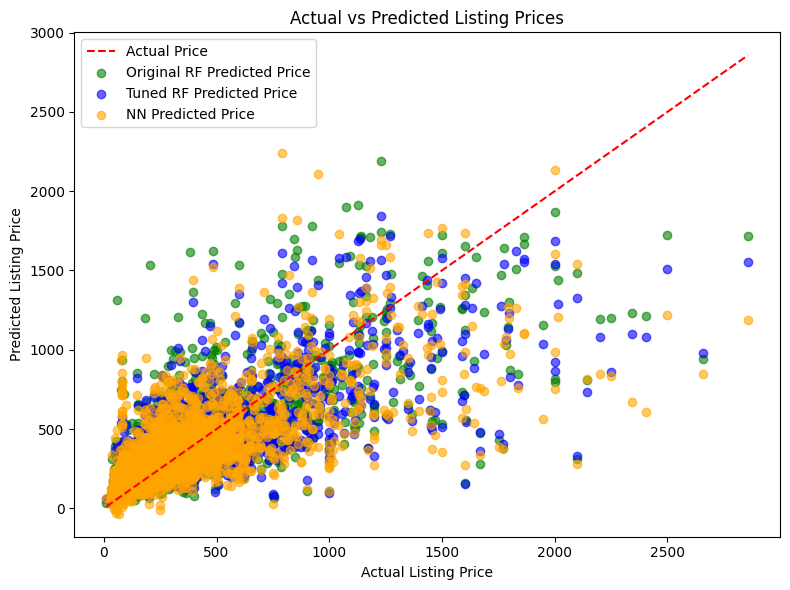

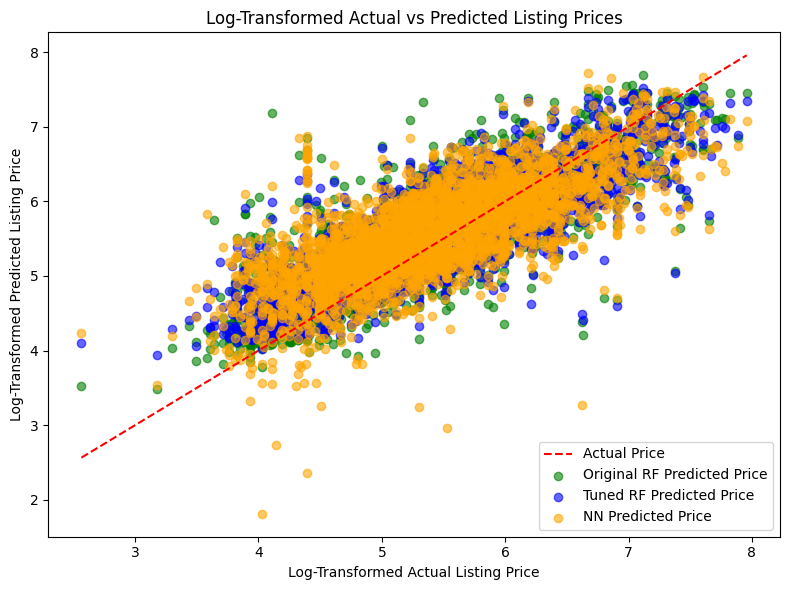

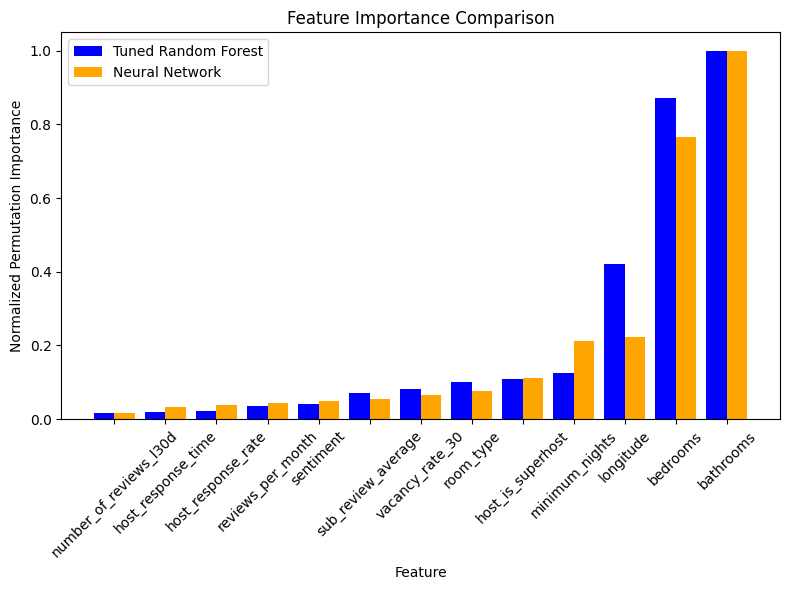

In [ ]:
# Plot actual vs predicted prices for the original RF, tuned RF, and NN models
plt.figure(figsize=(8, 6))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual Price')
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='green', label='Original RF Predicted Price')
plt.scatter(y_test, y_pred_best_rf, alpha=0.6, color='blue', label='Tuned RF Predicted Price')
plt.scatter(y_test, y_pred_nn, alpha=0.6, color='orange', label='NN Predicted Price')
plt.xlabel('Actual Listing Price')
plt.ylabel('Predicted Listing Price')
plt.title('Actual vs Predicted Listing Prices')
plt.legend()
plt.tight_layout()
plt.show()

# Plot log-transformed actual vs. predicted prices for the original RF, tuned RF, and NN models
plt.figure(figsize=(8, 6))
plt.plot([min(log_y_test), max(log_y_test)], [min(log_y_test), max(log_y_test)], color='red', linestyle='--', label='Actual Price')
plt.scatter(log_y_test, log_y_pred_rf, alpha=0.6, color='green', label='Original RF Predicted Price')
plt.scatter(log_y_test, log_y_pred_best_rf, alpha=0.6, color='blue', label='Tuned RF Predicted Price')
plt.scatter(log_y_test, log_y_pred_nn, alpha=0.6, color='orange', label='NN Predicted Price')
plt.xlabel('Log-Transformed Actual Listing Price')
plt.ylabel('Log-Transformed Predicted Listing Price')
plt.title('Log-Transformed Actual vs Predicted Listing Prices')
plt.legend()
plt.tight_layout()
plt.show()

# Plot combined feature importances for comparison
plt.figure(figsize=(8, 6))
bar_width = 0.4
index = np.arange(len(importance_df))

plt.bar(index, importance_df['Tuned Random Forest'], bar_width, label='Tuned Random Forest', color='blue')
plt.bar(index + bar_width, importance_df['Neural Network'], bar_width, label='Neural Network', color='orange')

plt.xlabel('Feature')
plt.ylabel('Normalized Permutation Importance')
plt.title('Feature Importance Comparison')
plt.xticks(index + bar_width / 2, importance_df['Feature'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Random Forest MSE: 38429.70235992446
Random Forest RMSE: 196.03495188339363
Random Forest MAE: 107.02892180310522
Random Forest MAPE: 42.2263450368768
Random Forest R^2: 0.5968851222320379
108/108 [==============================] - 0s 1ms/step


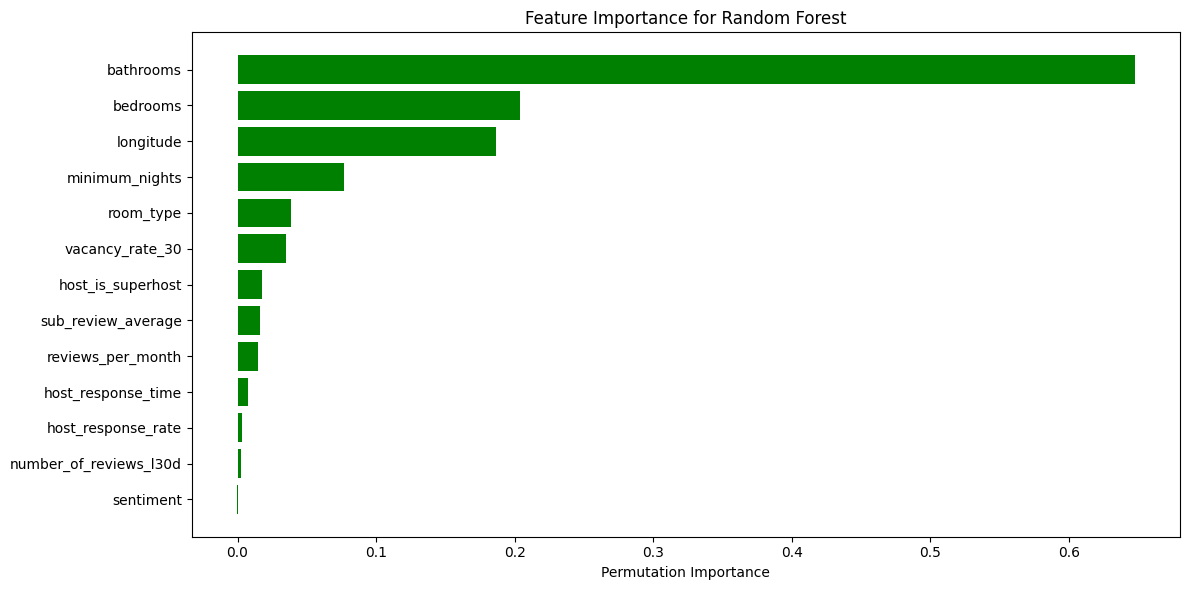

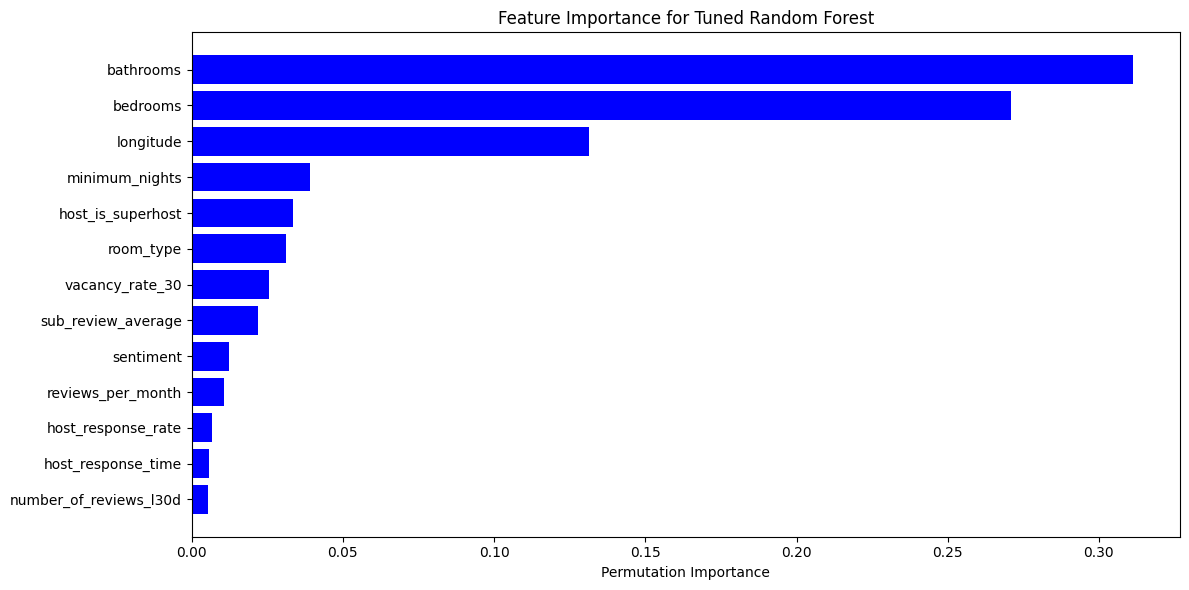

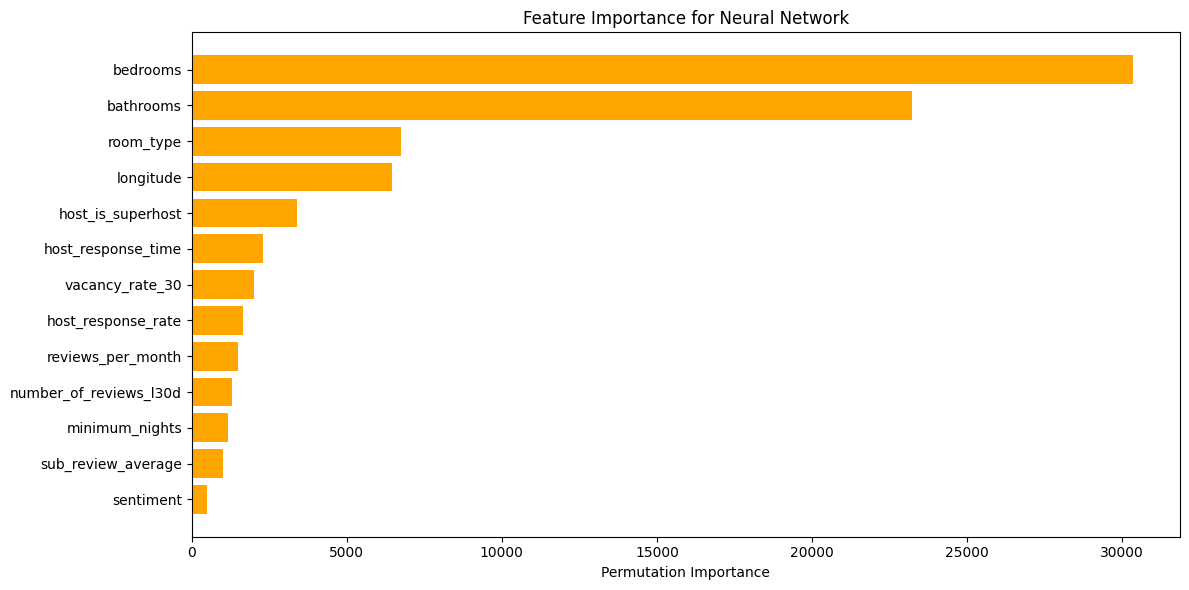

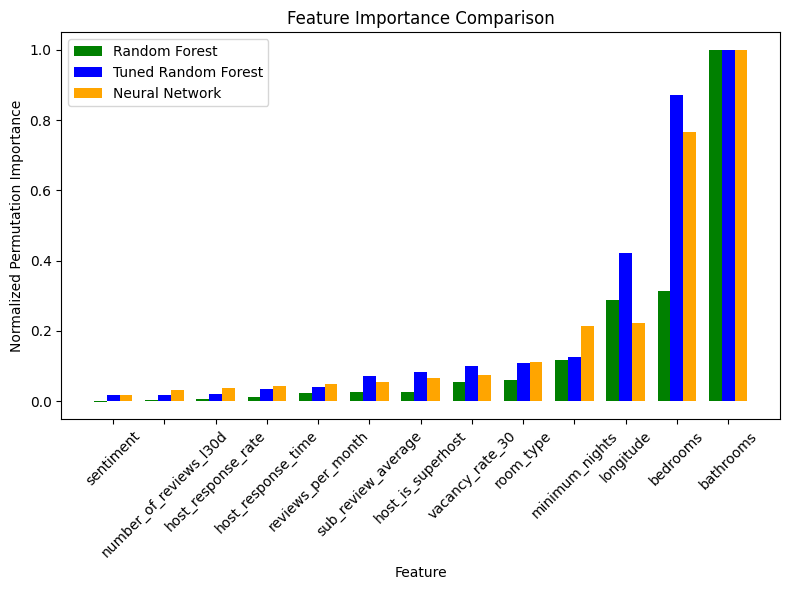

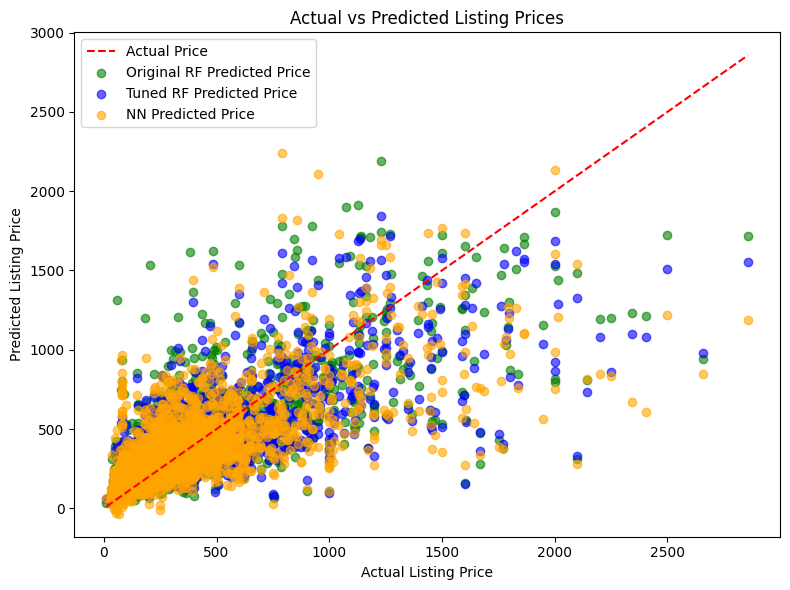

<ipython-input-34-39cc039f00ad>:113: RuntimeWarning: invalid value encountered in log1p
  log_y_pred_nn = np.log1p(y_pred_nn)


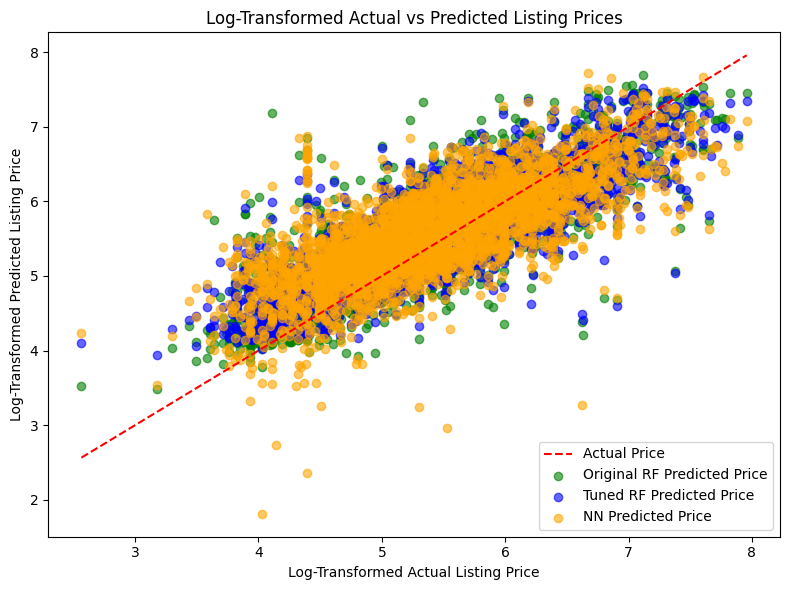

In [ ]:
# Define mean_absolute_percentage_error function
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions using the Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest MSE: {mse_rf}')
print(f'Random Forest RMSE: {rmse_rf}')
print(f'Random Forest MAE: {mae_rf}')
print(f'Random Forest MAPE: {mape_rf}')
print(f'Random Forest R^2: {r2_rf}')

# Compute permutation feature importance for Random Forest model
rf_importance = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx_rf = rf_importance.importances_mean.argsort()

# Compute permutation feature importance for tuned Random Forest model
tuned_rf_importance = permutation_importance(best_rf_model, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx_tuned_rf = tuned_rf_importance.importances_mean.argsort()

# Compute permutation feature importance for Neural Network model
nn_importance = permutation_importance(nn_model, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_squared_error')
sorted_idx_nn = nn_importance.importances_mean.argsort()

# Plot Random Forest feature importance
plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx_rf)), rf_importance.importances_mean[sorted_idx_rf], align="center", color='green')
plt.yticks(range(len(sorted_idx_rf)), [all_feature_names[i] for i in sorted_idx_rf])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance for Random Forest")
plt.tight_layout()
plt.show()

# Plot tuned Random Forest feature importance
plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx_tuned_rf)), tuned_rf_importance.importances_mean[sorted_idx_tuned_rf], align="center", color='blue')
plt.yticks(range(len(sorted_idx_tuned_rf)), [all_feature_names[i] for i in sorted_idx_tuned_rf])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance for Tuned Random Forest")
plt.tight_layout()
plt.show()

# Plot Neural Network feature importance
plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx_nn)), nn_importance.importances_mean[sorted_idx_nn], align="center", color='orange')
plt.yticks(range(len(sorted_idx_nn)), [all_feature_names[i] for i in sorted_idx_nn])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance for Neural Network")
plt.tight_layout()
plt.show()

# Combine feature importances for comparison
importance_df = pd.DataFrame({
    'Feature': [all_feature_names[i] for i in sorted_idx_rf],
    'Random Forest': rf_importance.importances_mean[sorted_idx_rf],
    'Tuned Random Forest': tuned_rf_importance.importances_mean[sorted_idx_tuned_rf],
    'Neural Network': nn_importance.importances_mean[sorted_idx_nn]
})

# Normalize the importances to the same scale (0 to 1)
importance_df['Random Forest'] /= importance_df['Random Forest'].max()
importance_df['Tuned Random Forest'] /= importance_df['Tuned Random Forest'].max()
importance_df['Neural Network'] /= importance_df['Neural Network'].max()


# Plot combined feature importances for comparison
plt.figure(figsize=(8, 6))
bar_width = 0.25
index = np.arange(len(importance_df))

plt.bar(index, importance_df['Random Forest'], bar_width, label='Random Forest', color='green')
plt.bar(index + bar_width, importance_df['Tuned Random Forest'], bar_width, label='Tuned Random Forest', color='blue')
plt.bar(index + 2 * bar_width, importance_df['Neural Network'], bar_width, label='Neural Network', color='orange')

plt.xlabel('Feature')
plt.ylabel('Normalized Permutation Importance')
plt.title('Feature Importance Comparison')
plt.xticks(index + bar_width, importance_df['Feature'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plot actual vs predicted prices for the original RF, tuned RF, and NN models
plt.figure(figsize=(8, 6))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual Price')
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='green', label='Original RF Predicted Price')
plt.scatter(y_test, y_pred_best_rf, alpha=0.6, color='blue', label='Tuned RF Predicted Price')
plt.scatter(y_test, y_pred_nn, alpha=0.6, color='orange', label='NN Predicted Price')
plt.xlabel('Actual Listing Price')
plt.ylabel('Predicted Listing Price')
plt.title('Actual vs Predicted Listing Prices')
plt.legend()
plt.tight_layout()
plt.show()

# Log-transform the actual and predicted values
log_y_test = np.log1p(y_test)
log_y_pred_rf = np.log1p(y_pred_rf)
log_y_pred_best_rf = np.log1p(y_pred_best_rf)
log_y_pred_nn = np.log1p(y_pred_nn)

# Plot log-transformed actual vs. predicted prices for the original RF, tuned RF, and NN models
plt.figure(figsize=(8, 6))
plt.plot([min(log_y_test), max(log_y_test)], [min(log_y_test), max(log_y_test)], color='red', linestyle='--', label='Actual Price')
plt.scatter(log_y_test, log_y_pred_rf, alpha=0.6, color='green', label='Original RF Predicted Price')
plt.scatter(log_y_test, log_y_pred_best_rf, alpha=0.6, color='blue', label='Tuned RF Predicted Price')
plt.scatter(log_y_test, log_y_pred_nn, alpha=0.6, color='orange', label='NN Predicted Price')
plt.xlabel('Log-Transformed Actual Listing Price')
plt.ylabel('Log-Transformed Predicted Listing Price')
plt.title('Log-Transformed Actual vs Predicted Listing Prices')
plt.legend()
plt.tight_layout()
plt.show()


## Step 12: Interpreting Results

### Feature Importance Comparison

The bar chart above compares the normalized permutation importance of features for three different models:
- **Random Forest (green)**: A non-hyperparameter tuned Random Forest model.
- **Tuned Random Forest (blue)**: A Random Forest model with hyperparameters optimized using Optuna.
- **Neural Network (orange)**: A Neural Network model.

### Key Observations:

1. **Consistent Top Features**:
   - **Bathrooms**: This feature consistently shows the highest importance across all three models. It indicates that the number of bathrooms is a crucial factor in predicting the listing price.
   - **Bedrooms**: This is the second most important feature, slightly less important than bathrooms but still significant across all models.
   - **Longitude**: While its importance varies, longitude is relatively more significant in the Tuned Random Forest model compared to the other models.
   
2. **Moderately Important Features**:
   - **Minimum Nights**: Shows moderate importance in both Random Forest models, indicating that the minimum number of nights a listing can be booked affects its price.
   - **Room Type**: This feature is also moderately important, reflecting the impact of the type of room (entire place, private room, etc.) on the listing price.

3. **Less Important Features**:
   - **Vacancy Rate (30 days)**, **Host is Superhost**, **Sub Review Average**, and others show lower importance across all models. These features contribute to the prediction but are not as influential as the top features.

### Model Performance:

- **Neural Network**:
  - The feature importance values are generally lower than the Random Forest models, but the overall pattern is similar.
  - The Neural Network model is flexible and capable of capturing complex relationships, which may explain the subtle differences in feature importance.

- **Tuned Random Forest**:
  - The optimized model shows higher importance for some features (e.g., Longitude) compared to the non-tuned Random Forest model.
  - Hyperparameter tuning has enhanced the model's ability to identify significant features more accurately.

- **Random Forest**:
  - The non-tuned model provides a baseline for feature importance, showing the relative significance of each feature without optimization.

### Conclusion:

This comparison helps us understand which features are most influential in predicting the listing price. The consistent top features (bathrooms, bedrooms, and longitude) across all models highlight their critical role. The tuned Random Forest model offers a refined perspective, identifying key features more precisely. Overall, this analysis provides valuable insights into the factors that impact listing prices, guiding further improvements in model performance and feature selection.

## Step 13: Analyzing the Impact of Bathrooms and Bedrooms on Price

In this step, we aim to visualize how the number of bathrooms and bedrooms in a listing affects its price. By doing so, we can identify patterns and determine if there are optimal ranges for these features that significantly influence the listing price.

### Visualization and Analysis:

1. **Combined Boxplot**:
   - The combined boxplot displays the distribution of listing prices for different counts of bathrooms and bedrooms.
   - Red boxes represent the distribution of prices for listings with varying numbers of bathrooms.
   - Blue boxes represent the distribution of prices for listings with varying numbers of bedrooms.
   - Outliers are not shown to provide a clearer view of the central tendency and spread of the data.

2. **LOESS Curves**:
   - LOESS (Locally Estimated Scatterplot Smoothing) curves are fitted to show the trend in price as the number of bathrooms and bedrooms increases.
   - The red line represents the LOESS curve for bathrooms, indicating how price changes with an increasing number of bathrooms.
   - The blue line represents the LOESS curve for bedrooms, indicating how price changes with an increasing number of bedrooms.

### Key Observations:

1. **Bathrooms**:
   - There is a clear upward trend in price with an increasing number of bathrooms, as shown by the red LOESS curve.
   - Listings with more bathrooms generally have higher prices, reflecting the added value of additional bathrooms.

2. **Bedrooms**:
   - Similarly, there is an upward trend in price with an increasing number of bedrooms, as shown by the blue LOESS curve.
   - However, the trend for bedrooms is not as steep as for bathrooms, indicating that while additional bedrooms do increase price, the effect is slightly less pronounced compared to bathrooms.

3. **Combined Impact**:
   - The combined visualization allows us to compare the effects of bathrooms and bedrooms side by side.
   - Both features show a positive correlation with price, but the increase in price per additional bathroom is more substantial.

### Conclusion:

This analysis highlights the significant impact of bathrooms and bedrooms on listing prices. Understanding these relationships helps in making informed decisions about property listings. For instance, focusing on increasing the number of bathrooms might yield a higher return on investment compared to adding more bedrooms. This insight can guide property improvements and pricing strategies to optimize rental income.



/usr/local/lib/python3.10/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: divide by zero encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/usr/local/lib/python3.10/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/usr/local/lib/python3.10/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:232: RuntimeWarning: divide by zero encountered in divide
  _, weights = _lowess(y, x, x, np.ones_like(x),
/usr/local/lib/python3.10/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:232: RuntimeWarning: invalid value encountered in divide
  _, weights = _lowess(y, x, x, np.ones_like(x),


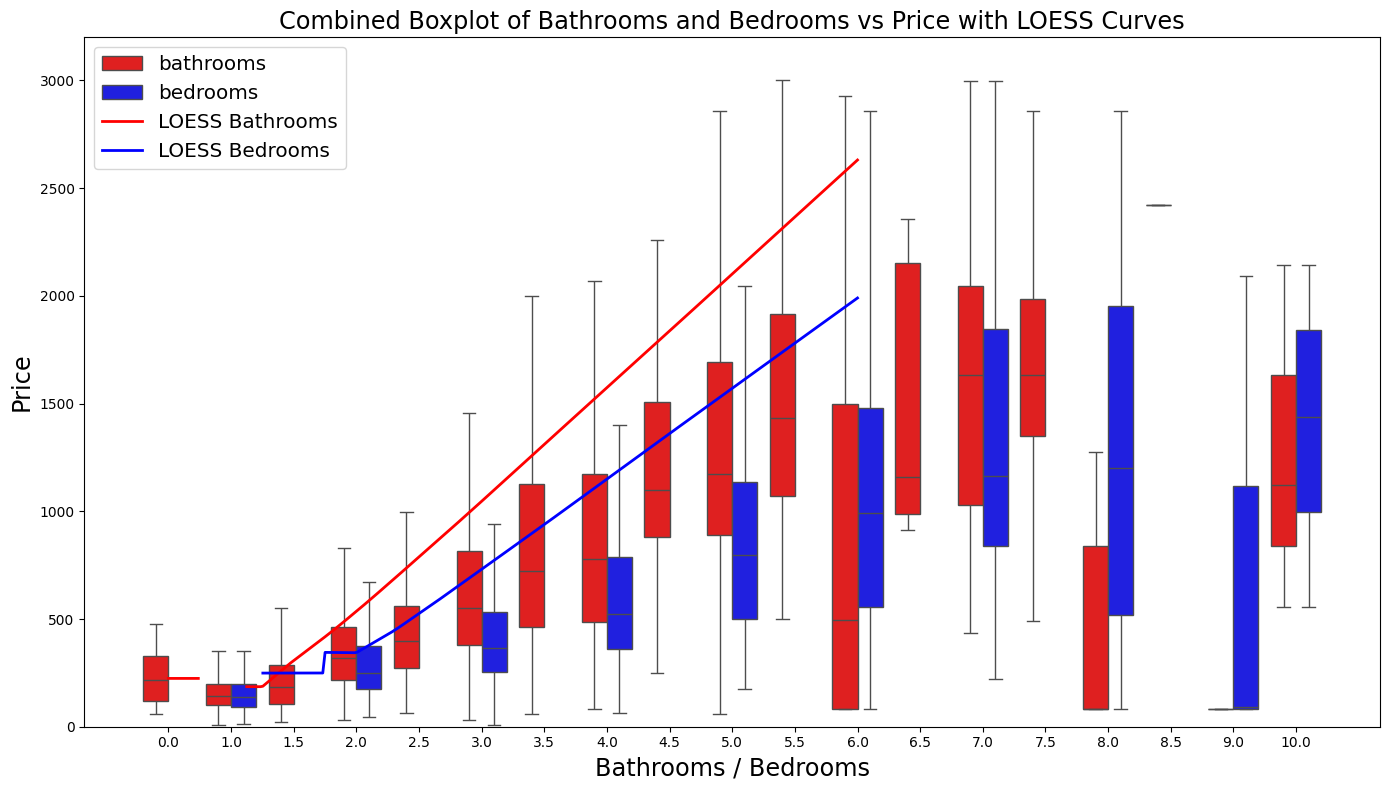

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming subset_df is your DataFrame and already filtered

import matplotlib.pyplot as plt
import seaborn as sns

# Define the important features
important_features = ['bathrooms', 'bedrooms', 'longitude', 'vacancy_rate_30', 'price']

# Extract the relevant subset of the dataset
subset_df = listings_cleaned_reduced[important_features]

# Filter out data with bathrooms and bedrooms greater than 11
subset_df = subset_df[(subset_df['bathrooms'] <= 11) & (subset_df['bedrooms'] <= 10)]


# Combine bathrooms and bedrooms into a single DataFrame for plotting
combined_df = pd.melt(subset_df[['price', 'bathrooms', 'bedrooms']], id_vars=['price'], var_name='Feature', value_name='Count')

plt.figure(figsize=(14, 8))

# Create a boxplot for bathrooms and bedrooms side by side without outliers
sns.boxplot(x='Count', y='price', data=combined_df, hue='Feature', palette={'bathrooms': 'red', 'bedrooms': 'blue'}, width=0.8, showfliers=False)

# Fit and plot LOESS curve for bathrooms
x_range = np.linspace(0, 11, 300)  # Generate more points for smoother curve
loess_bath = sm.nonparametric.lowess(subset_df['price'], subset_df['bathrooms'], frac=0.5)
loess_bath_x_range = sm.nonparametric.lowess(subset_df['price'], subset_df['bathrooms'], frac=0.5, xvals=x_range)
plt.plot(x_range, loess_bath_x_range, color='red', label='LOESS Bathrooms', linewidth=2)

# Fit and plot LOESS curve for bedrooms
loess_bed = sm.nonparametric.lowess(subset_df['price'], subset_df['bedrooms'], frac=0.3)
loess_bed_x_range = sm.nonparametric.lowess(subset_df['price'], subset_df['bedrooms'], frac=0.3, xvals=x_range)
plt.plot(x_range, loess_bed_x_range, color='blue', label='LOESS Bedrooms', linewidth=2)

plt.ylim(0, 3200)
plt.title('Combined Boxplot of Bathrooms and Bedrooms vs Price with LOESS Curves',fontsize='xx-large')
plt.xlabel('Bathrooms / Bedrooms',fontsize='xx-large')
plt.ylabel('Price',fontsize='xx-large')
plt.legend(loc='upper left', fontsize='x-large')
plt.tight_layout()
plt.show()


## Step 14: Analyzing the Impact of Longitude on Price

In this step, we explore the relationship between the geographical longitude of listings and their prices. By categorizing longitude into quartiles and visualizing the distribution of prices within these categories, we can gain insights into how location influences pricing.

### Visualization and Analysis:

1. **Box Plot of Price by Longitude Category**:
   - Listings are divided into four quartiles based on their longitude values: Q1, Q2, Q3, and Q4.
   - A box plot is created for each quartile to show the distribution of prices within each category.
   - The box plot provides a visual representation of the median, quartiles, and spread of prices.
   - Error bars and a line connecting the means of each quartile are added to highlight the central tendency and variability.

2. **Heatmap of Price by Location**:
   - A heatmap is created to visualize the spatial distribution of prices across the area.
   - The heatmap layer is added to a base map, with higher prices indicated by more intense colors.

### Key Observations:

1. **Longitude Categories and Price**:
   - The box plot reveals that price distributions vary across different longitude categories.
   - Generally, listings in higher longitude quartiles (Q3 and Q4) tend to have higher prices, as indicated by the upward trend in means.
   - The spread of prices also increases in higher longitude categories, reflecting greater variability.

2. **Geographical Price Distribution**:
   - The heatmap provides a spatial overview of price concentrations across the area.
   - Areas with higher listing prices are indicated by more intense colors, helping to identify high-demand regions.

### Conclusion:

The analysis highlights the significant impact of location (longitude) on listing prices. Listings in certain geographical areas, particularly those in higher longitude quartiles, command higher prices. This insight is valuable for understanding regional market trends and can inform pricing strategies and investment decisions. The heatmap further aids in visualizing price concentrations, offering a clear view of high-value areas.


<ipython-input-104-56d36e084ddf>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['longitude_category'] = pd.cut(


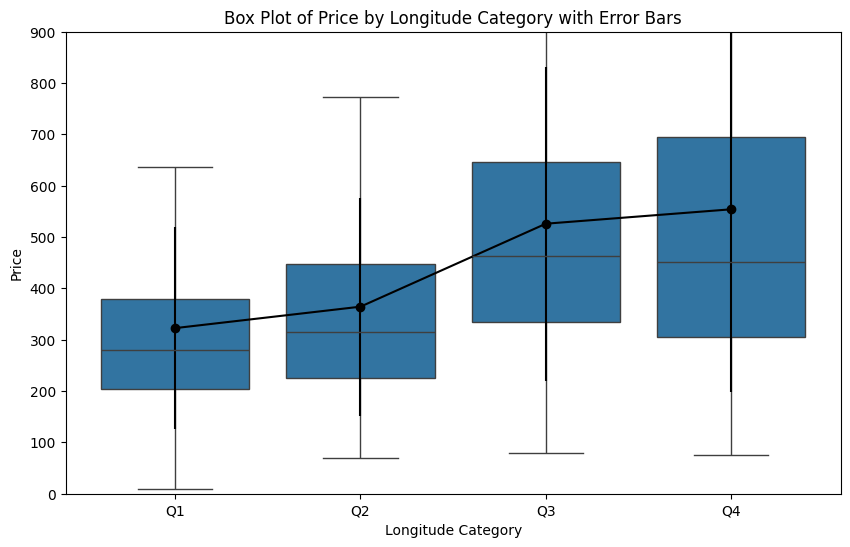

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming subset_df is your DataFrame and already filtered

# Create quartiles for longitude
quartiles_longitude = subset_df['longitude'].quantile([0.25, 0.5, 0.75])
subset_df['longitude_category'] = pd.cut(
    subset_df['longitude'],
    bins=[-np.inf, quartiles_longitude[0.25], quartiles_longitude[0.5], quartiles_longitude[0.75], np.inf],
    labels=['Q1', 'Q2', 'Q3', 'Q4']
)

# Plotting the box plot for longitude
plt.figure(figsize=(10, 6))
sns.boxplot(x='longitude_category', y='price', data=subset_df, showfliers=False)

# Calculate means and standard deviations for longitude
means_longitude = subset_df.groupby('longitude_category')['price'].mean()
stds_longitude = subset_df.groupby('longitude_category')['price'].std()

# Plot error bars and line connecting means for longitude
plt.errorbar(x=[0, 1, 2, 3], y=means_longitude, yerr=stds_longitude, fmt='o', color='black')
plt.plot([0, 1, 2, 3], means_longitude, color='black')

plt.ylim(0, 900)  # Setting the y-axis limit to only show prices under 1500
plt.title('Box Plot of Price by Longitude Category with Error Bars')
plt.xlabel('Longitude Category')
plt.ylabel('Price')
plt.show()

import folium
import pandas as pd
from folium.plugins import HeatMap

# Assuming subset_df is your DataFrame and already filtered

# Create a base map
m = folium.Map(location=[listings_cleaned['latitude'].mean(), listings_cleaned['longitude'].mean()], zoom_start=12)

# Prepare data for the heatmap
heat_data = listings_cleaned[['latitude', 'longitude', 'price']].dropna()

# Add a heatmap layer to the map
HeatMap(data=heat_data[['latitude', 'longitude', 'price']].values.tolist(), radius=10).add_to(m)

# Save the map as an HTML file
m.save('price_heatmap.html')

# To display the map in a Jupyter notebook, you can use the following
m


## Step 15: Analyzing the Impact of Vacancy Rate on Price

In this step, we explore the relationship between the vacancy rate of listings and their prices. By categorizing vacancy rates into two halves and visualizing the distribution of prices within these categories, we can gain insights into how occupancy affects pricing.

### Visualization and Analysis:

1. **Box Plot of Price by Vacancy Rate (30 days) Category**:
   - Listings are divided into two categories based on the median vacancy rate: Lower Half and Upper Half.
   - A box plot is created for each category to show the distribution of prices within each group.
   - The box plot provides a visual representation of the median, quartiles, and spread of prices.
   - Error bars and a line connecting the means of each category are added to highlight the central tendency and variability.

### Key Observations:

1. **Vacancy Rate Categories and Price**:
   - The box plot reveals that price distributions are similar across the two vacancy rate categories.
   - Listings in the Upper Half category tend to have slightly higher prices, as indicated by the means, but the difference is not substantial.
   - The spread of prices is similar in both categories, reflecting comparable variability.

### Conclusion:

The analysis highlights the relationship between vacancy rate and listing prices. While there is a slight increase in prices for listings with higher vacancy rates, the difference is not significant. This insight is valuable for understanding how occupancy rates might influence pricing strategies. The box plot and error bars provide a clear view of price distributions within each category.


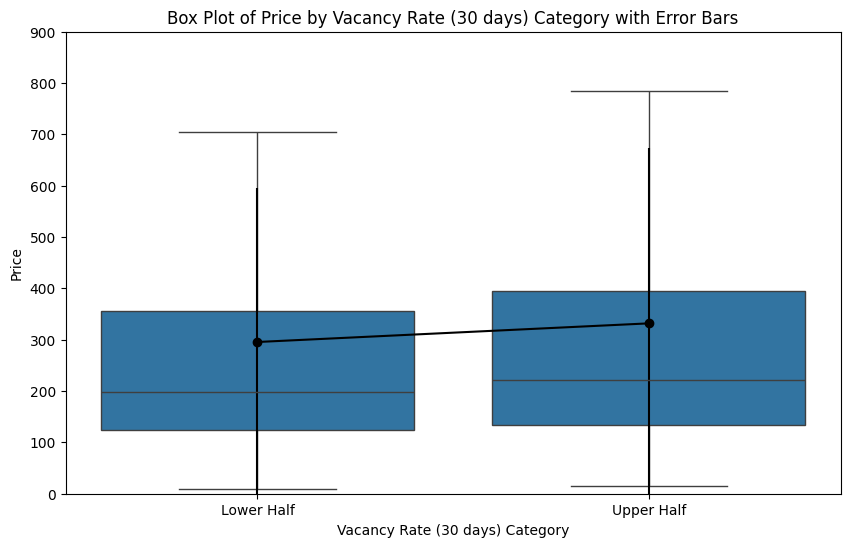

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Assuming subset_df is your DataFrame and already filtered

# Create two quartiles (halves) for vacancy_rate_30
median = subset_df['vacancy_rate_30'].median()
subset_df['vacancy_rate_30_category'] = pd.cut(
    subset_df['vacancy_rate_30'],
    bins=[-np.inf, median, np.inf],
    labels=['Lower Half', 'Upper Half']
)

# Plotting the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='vacancy_rate_30_category', y='price', data=subset_df, showfliers=False)

# Calculate means and standard deviations
means = subset_df.groupby('vacancy_rate_30_category')['price'].mean()
stds = subset_df.groupby('vacancy_rate_30_category')['price'].std()

# Plot error bars and line connecting means
plt.errorbar(x=[0, 1], y=means, yerr=stds, fmt='o', color='black')
plt.plot([0, 1], means, color='black')

plt.ylim(0, 900)  # Setting the y-axis limit to only show prices under 1500
plt.title('Box Plot of Price by Vacancy Rate (30 days) Category with Error Bars')
plt.xlabel('Vacancy Rate (30 days) Category')
plt.ylabel('Price')
plt.show()


### (Bonus) Describe Other Ideas to Increase Expected Revenue

In this bonus step, we explore optimizing the pricing strategy to balance the vacancy rate and maximize revenue. By identifying optimal price ranges that minimize the vacancy rate, we can enhance the overall profitability of the listings. Here, we analyze the relationship between price and vacancy rate for different configurations of listings.

#### Visualization and Analysis:

1. **3-Bedroom Listings**:
   - The first plot focuses on listings with 3 bedrooms.
   - **Scatter Plot**:
     - Displays the relationship between price and vacancy rate (30 days) for 3-bedroom listings.
     - Blue dots represent individual data points.
   - **LOESS Curve**:
     - A red LOESS curve (Locally Estimated Scatterplot Smoothing) indicates the trend in vacancy rate as the price changes.
   - **Optimal Price Ranges**:
     - Vertical dotted red lines mark price points at $600 and $900.
     - These price points are chosen based on the observed trend to highlight optimal pricing ranges where the vacancy rate is relatively lower.

2. **5-Bedroom and 3-Bathroom Listings**:
   - The second plot focuses on listings with 5 bedrooms and 3 bathrooms.
   - **Scatter Plot**:
     - Displays the relationship between price and vacancy rate (30 days) for 5-bedroom, 3-bathroom listings.
     - Blue dots represent individual data points.
   - **LOESS Curve**:
     - A red LOESS curve indicates the trend in vacancy rate as the price changes.
   - **Optimal Price Ranges**:
     - Vertical dotted red lines mark price points at $900 and $1,200.
     - These price points are chosen to highlight optimal pricing ranges where the vacancy rate is relatively lower.

### Key Observations:

1. **3-Bedroom Listings**:
   - The LOESS curve shows that there is a noticeable change in vacancy rate around the $600 to $900 price range.
   - This suggests that pricing the 3-bedroom listings within this range could potentially minimize the vacancy rate, optimizing revenue.

2. **5-Bedroom and 3-Bathroom Listings**:
   - The LOESS curve indicates a similar trend around the $900 to $1,200 price range.
   - By setting prices within this range, the vacancy rate can be optimized, leading to increased revenue for these larger listings.

### Conclusion:

By analyzing the relationship between price and vacancy rate, we can identify optimal price ranges that help minimize the vacancy rate and maximize revenue. This approach allows us to make data-driven decisions on pricing strategies for different types of listings, ultimately enhancing overall profitability.


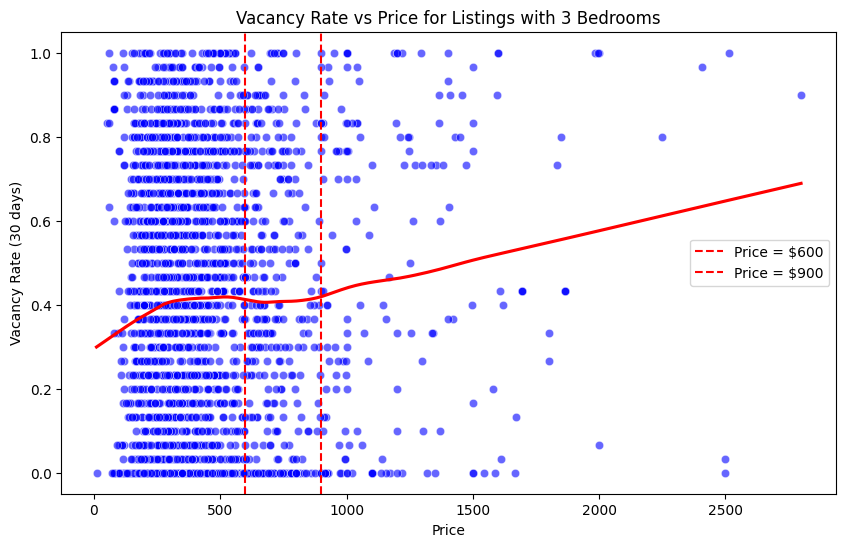

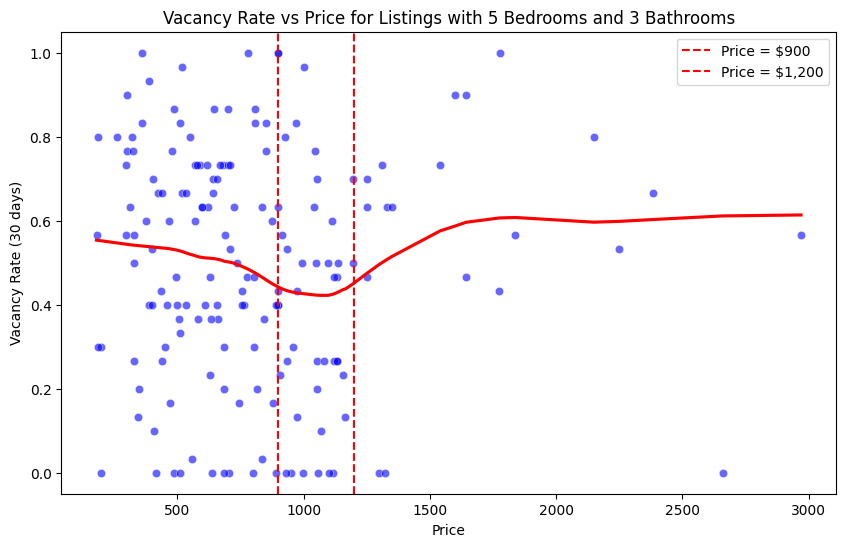

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

# Subset the dataset for listings with 3 bedrooms
subset_df = listings_cleaned_reduced[listings_cleaned_reduced['bedrooms'] == 3]

# Plot vacancy rate on the Y-axis and price on the X-axis with a lowess curve
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='vacancy_rate_30', data=subset_df, alpha=0.6, color='blue')
sns.regplot(x='price', y='vacancy_rate_30', data=subset_df, lowess=True, scatter=False, color='red')

# Add vertical dotted red lines at X = 400 and X = 700
plt.axvline(x=600, color='red', linestyle='--', label='Price = $600')
plt.axvline(x=900, color='red', linestyle='--', label='Price = $900')

plt.title('Vacancy Rate vs Price for Listings with 3 Bedrooms')
plt.xlabel('Price')
plt.ylabel('Vacancy Rate (30 days)')
plt.legend()
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# Subset the dataset for listings with 3 bedrooms and 2 bathrooms
subset_df = listings_cleaned_reduced[(listings_cleaned_reduced['bedrooms'] == 5) & (listings_cleaned_reduced['bathrooms'] == 3)]

# Plot vacancy rate on the Y-axis and price on the X-axis with a lowess curve
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='vacancy_rate_30', data=subset_df, alpha=0.6, color='blue')
sns.regplot(x='price', y='vacancy_rate_30', data=subset_df, lowess=True, scatter=False, color='red')

# Add vertical dotted red lines at X = 400 and X = 700
plt.axvline(x=900, color='red', linestyle='--', label='Price = $900')
plt.axvline(x=1200, color='red', linestyle='--', label='Price = $1,200')

plt.title('Vacancy Rate vs Price for Listings with 5 Bedrooms and 3 Bathrooms')
plt.xlabel('Price')
plt.ylabel('Vacancy Rate (30 days)')
plt.legend()
plt.show()

